# Derivatives Analytics - Objects Composition

**Author**: [Gabriele Pompa](https://www.linkedin.com/in/gabrielepompa/): gabriele.pompa@unisi.com

# Table of contents

[Executive Summary](#executive-summary)

**TODO**

### **Resources**: 

- [_Python for Finance (2nd ed.)_](http://shop.oreilly.com/product/0636920117728.do): Chapter 6 Object-Oriented Programming.


- [Object-Oriented Programming in Python](https://python-textbok.readthedocs.io/en/1.0/index.html): Section [Object-oriented programming](https://python-textbok.readthedocs.io/en/1.0/Object_Oriented_Programming.html)



# Executive Summary <a name="executive-summary"></a>

**Make intro**

The following sections are organized as follows:

- **TODO**

These are the basic imports

In [1]:
# for NumPy arrays
import numpy as np

# for Pandas Series and DataFrame
import pandas as pd

# for statistical functions
from scipy import stats

# for Matplotlib plotting
import matplotlib.pyplot as plt

# to do inline plots in the Notebook
%matplotlib inline

# for Operating System operations
import os

# for some mathematical functions
import math

# for date management
import datetime as dt

## `*args` and `**kwargs`

In [2]:
def print_args(*args):
    for arg in args:
        print(arg)

In [3]:
print_args("one", "two", "three")

one
two
three


In [4]:
print_args("one", "two", "three", "four")

one
two
three
four


If a function takes `*args` positional parameters, it also means that we can call it unpacking (through the `*` operator) a standard Tuple, like `tup` here

In [5]:
tup = ("a", 1, "c")

print_args(*tup)

a
1
c


This make it easier to make variable-length positional parameters flow through nested functions, like here:

In [6]:
def print_args_wrapper(*args):
    print("I am in print_args_wrapper function")
    # here args is a Tuple, that is un-packed by the * operator and passed to print_args function
    print_args(*args)

In [7]:
print_args_wrapper(tup)

I am in print_args_wrapper function
('a', 1, 'c')


In [8]:
def print_kwargs(**kwargs):
    for k, v in kwargs.items():
        print("{}: {}".format(k, v))

In [9]:
print_kwargs(name="Jane", surname="Doe")

name: Jane
surname: Doe


In [10]:
print_kwargs(age=10)

age: 10


If a function takes `**args` keyword parameters, it also means that we can call it unpacking (through the `**` operator) a standard Dict, like `d` here

In [11]:
d = {"k1": "a", "k2": 1, "k3": "c"}

print_kwargs(**d)

k1: a
k2: 1
k3: c


This make it easier to make keyword parameters flow through nested functions, like here:

In [12]:
def print_kwargs_wrapper(**kwargs):
    print("I am in print_kwargs_wrapper function")
    # here kwargs is a Dict, that is un-packed in key-value pairs by the ** operator and passed to print_kwargs function
    print_kwargs(**kwargs)

In [13]:
print_kwargs_wrapper(**d)

I am in print_kwargs_wrapper function
k1: a
k2: 1
k3: c


If a function takes only `*args` and `**kwargs` as its parameters, it can be called with any set of parameters

In [14]:
def print_everything(*args, **kwargs):
    for arg in args:
        print(arg)

    for k, v in kwargs.items():
        print("{}: {}".format(k, v))

In [15]:
print_everything("one", "two", "three")

one
two
three


In [16]:
print_everything(name="Jane", surname="Doe")

name: Jane
surname: Doe


In [17]:
print_everything("one", "two", "three", name="Jane", surname="Doe")

one
two
three
name: Jane
surname: Doe


This means also no parameters

In [18]:
print_everything()

As previously seen for `*args` and `**kwargs` separately, the use of `*args` and `**kwargs` make it easy to flow parameters through nested functions, like here:

In [19]:
def print_everything_wrapper(*args, **kwargs):
    print("I am in print_everything_wrapper function")
    # here args is a Tuple, that is un-packed by the * operator and passed to print_everything function
    # here kwargs is a Dict, that is un-packed in key-value pairs by the ** operator and passed to print_everything function
    print_everything(*args, **kwargs)

In [20]:
print_everything_wrapper(*tup, **d)

I am in print_everything_wrapper function
a
1
c
k1: a
k2: 1
k3: c


DA RISPIEGARE 

This makes it allows the nesting function `print_everything_wrapper` to ignore the details of the parameters of the nested function `print_everything`. This is particularly useful when the nesting function is the constructor (the `__init__()`) of a derived class and the nested function is the constructor of the base class (the `super().__init__()`).

`*args` and `**kwargs` can be mixed with ordinary parameters, which must come first in function's definition

In [21]:
def print_everything_combined(city, title="default_title", *args, **kwargs):
    
    print("city is {}".format(city))
    
    print("title is {}".format(title))
    
    for arg in args:
        print(arg)

    for k, v in kwargs.items():
        print("{}: {}".format(k, v))

In [22]:
print_everything_combined("Rome", "one", "two", "three", name="Jane", surname="Doe")

city is Rome
title is one
two
three
name: Jane
surname: Doe


In [23]:
print_everything_combined("Rome", "different title", "one", "two", "three", name="Jane", surname="Doe")

city is Rome
title is different title
one
two
three
name: Jane
surname: Doe


In [24]:
# raises: SyntaxError: positional argument follows keyword argument
#
# print_everything_combined(city="Rome", "one", "two", "three", name="Jane", surname="Doe")

# Polymorphism application: a `Plotter()` class

First let's define a common MarketEnvironment class which shall contain the information on market environment and underlying level. This class will be used to instantiate the EuropeanOption class

In [25]:
class MarketEnvironment:
    """
    MarketEnvironment class: setting the market environment: date, underlying level, volatility level and short-rate.
    
    Attributes:
    -----------
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        r (float):                continuously compounded short-rate;
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        sigma (float):            volatility of underlying asset;
    
    Public Methods:
    --------   
    
        getters and setters for all attributes
        
    Usage: 
    --------   
        - default: MarketEnvironment() is equivalent to 
                   MarketEnvironment(t="19-04-2020", r=0.05, S_t=90.0, sigma=0.2)

        - general: MarketEnvironment(t="DD-MM-YYYY" String, r=Float, S_t=Float, sigma=Float)
    """
    
    def __init__(self, t="19-04-2020", r=0.05, S_t=90.0, sigma=0.2):
        
        print("Initializing the MarketEnvironment!")
        
        self.__t     = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        self.__r     = r
        self.__S     = S_t
        self.__sigma = sigma
        
    def __repr__(self):
        return r"MarketEnvironment(t={}, r={:.1f}%, S_t={:.1f}, sigma={:.1f}%)".\
               format(self.get_t().strftime("%d-%m-%Y"), self.get_r()*100, self.get_S(), self.get_sigma()*100)

    # getters
    def get_t(self):
        return self.__t

    def get_r(self):
        return self.__r

    def get_S(self):
        return self.__S
    
    def get_sigma(self):
        return self.__sigma
    
    # setters 
    def set_t(self, t):
        # notice that there is no need to update the time-to-maturity of the options,
        # since in this way of modeling, the MarketEnvironment is the first thing that gets instantiated.
        # Financial instruments follow.
        self.__t = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t

    def set_r(self, r):
        self.__r = r

    def set_S(self, S):
        self.__S = S
        
    def set_sigma(self, sigma):
        self.__sigma = sigma

In [26]:
market_env = MarketEnvironment(t="01-06-2020", r=-0.002, S_t=10.0, sigma=0.4)
market_env

Initializing the MarketEnvironment!


MarketEnvironment(t=01-06-2020, r=-0.2%, S_t=10.0, sigma=40.0%)

In [27]:
market_env = MarketEnvironment()
market_env

Initializing the MarketEnvironment!


MarketEnvironment(t=19-04-2020, r=5.0%, S_t=90.0, sigma=20.0%)

In [28]:
class EuropeanOption:
    """
    EuropeanOption abstract class: an interface setting the template for any option with european-style exercise.
    This class is not meant to be instantiated.
    
    Attributes:
    -----------
        type (str):               type of the option. Can be either 'call' or 'put';
        S_t (float):              'S' attribute of mkt_env.
        K (float):                strike price;
        t (str; dt.datetime):     't' attribute of mkt_env.
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                'r' attribute of mkt_env.
        sigma (float):            'sigma' attribute of mkt_env.
    
    Template Methods:
    --------   
    
        getters for all common attributes
        
        setters for common attributes, not belonging to mkt_env
        
        payoff: float
            Template method for payoff. Raises NotImplementedError if called.

        price_upper_limit: float 
            Template method for upper limit. Raises NotImplementedError if called.

        price_lower_limit: float 
            Template method for lower limit. Raises NotImplementedError if called.
            
        price: float
            Template method for price. Raises NotImplementedError if called.

    """

    def __init__(self, mkt_env, option_type='call', K=100.0, T="31-12-2020"):
        
        print("Initializing the EuropeanOption!")

        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
        
        self.__type  = option_type
        self.__S     = mkt_env.get_S()
        self.__K     = K
        self.__t     = mkt_env.get_t()
        self.__T     = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        self.__tau   = self.__time_to_maturity()
        self.__r     = mkt_env.get_r()
        self.__sigma = mkt_env.get_sigma()
               
        # empty informations dictionary
        self.__docstring_dict = {}        
        
    # string representation method template
    def __repr__(self):
        raise NotImplementedError()
    
    # getters
    def get_type(self):
        return self.__type

    def get_S(self):
        return self.__S
    
    def get_sigma(self):
        return self.__sigma
    
    def get_K(self):
        return self.__K
    
    def get_t(self):
        return self.__t

    def get_T(self):
        return self.__T

    def get_tau(self):
        return self.__tau

    def get_r(self):
        return self.__r
    
    def get_sigma(self):
        return self.__sigma
    
    # doctring getter template
    def get_docstring(self, label):
        raise NotImplementedError()

    # setters
    def set_type(self, option_type):
        self.__type = option_type
        
        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
            
    def set_K(self, K):
        self.__K = K
    
    def set_T(self, T):
        self.__T = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        # update time to maturity, given changed T, to keep internal consistency
        self.__update_tau() 
    
    def set_tau(self, tau):
        self.__tau = tau
        # update expiration date, given changed tau, to keep internal consistency
        self.__update_T()
        
    def __update_T(self):
        self.__T = self.__t + dt.timedelta(days=math.ceil(self.__tau*365))

    # time to maturity method (private)
    def __time_to_maturity(self):
        return (self.__T - self.__t).days / 365.0
    
    # payoff template
    def payoff(self):
        raise NotImplementedError()     
        
    # upper price limit template
    def price_upper_limit(self):
        raise NotImplementedError()     

    # lower price limit template
    def price_lower_limit(self):
        raise NotImplementedError()     
        
    # price template
    def price(self):
        raise NotImplementedError()

In [29]:
from collections.abc import Iterable

In [30]:
class PlainVanillaOption(EuropeanOption):
    """
    PlainVanillaOption class implementing payoff and pricing of plain-vanilla call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        mkt_env (MarketEnvironment): Instance of MarketEnvironment class
        type (str):                  From 'type' attribute of EuropeanOption base class.
        S_t (float):                 'S' attribute of mkt_env.
        K (float):                   From 'K' attribute of EuropeanOption base class.
        t (str; dt.datetime):        't' attribute of mkt_env.
        T (str; dt.datetime):        From 'T' attribute of EuropeanOption base class.
        tau (float):                 time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                   'r' attribute of mkt_env.
        sigma (float):               'sigma' attribute of mkt_env.
    
    Public Methods:
    --------   
    
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla option price.
            
        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    Usage: 
    --------   
        - default: PlainVanillaOption(mkt_env) is equivalent to 
                   PlainVanillaOption(mkt_env, option_type='call', K=100.0, T="31-12-2020")

        - general: PlainVanillaOption(mkt_env, option_type='call' or 'put' String, K=Float, T="DD-MM-YYYY" String)

    where: mkt_env is a MarketEnvironment instance.
    """
    
    # initializer with optional *args and **kwargs parameters
    def __init__(self, *args, **kwargs):  
        
        # calling the EuropeanOption constructor
        super(PlainVanillaOption, self).__init__(*args, **kwargs)
        
        # info strings
        self.__info = r"Plain Vanilla {} (K={:.1f}, tau={:.2f}y)".format(self.get_type(), self.get_K(), self.get_tau())
        self.__mkt_info = r"[S_t={:.1f}, r={:.1f}%, sigma={:.1f}%]".format(self.get_S(), self.get_r()*100, self.get_sigma()*100)
        
        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $S_t$",
                'payoff':            r"Payoff: $max(S-K, 0)$",
                'price_lower_limit': r"Lower limit: $max(S_t - K e^{-r \tau}, 0)$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $K e^{-r \tau}$",
                'payoff':            r"Payoff: $max(K-S, 0)$",
                'price_lower_limit': r"Lower limit: $max(K e^{-r \tau} - S_t, 0)$"}
        }
                
    def __repr__(self):
        return r"PlainVanillaOption('{}', S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_info(self):
        return self.__info
    
    def get_mkt_info(self):
        return self.__mkt_info

    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label] 
    
    # payoff calculation - with optional *args and **kwargs parameters
    def payoff(self, *args, **kwargs):
        """
        Can be called as:
            - payoff(): uses .get_S() 
            - payoff(100.0): S == 100.0
            - payoff(S=100.0)
            - payoff([100.0, ..., 120.0]): S == [100.0, ..., 120.0] 
            - payoff(S=[100.0, ..., 120.0])
        """
        
        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
                
        # call case
        if self.get_type() == 'call':
            return self.__call_payoff(S)
        # put case
        else:
            return self.__put_payoff(S)
    
    def __call_payoff(self, S):
        if isinstance(S, Iterable):
            return np.array([max(0.0, s - self.get_K()) for s in S])
        else:
            return max(0.0, S - self.get_K())

    def __put_payoff(self, S):
        if isinstance(S, Iterable):
            return np.array([max(0.0, self.get_K() - s) for s in S])
        else:
            return max(0.0, self.get_K() - S)
        
    # upper price limit - with optional *args and **kwargs parameters
    def price_upper_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_upper_limit(): uses .get_S() and .get_tau()
            - price_upper_limit(100.0): S == 100.0
            - price_upper_limit(100.0, 0.1): S == 100.0 and tau == 0.1
            - price_upper_limit(S=100.0, tau=0.1)
            - price_upper_limit([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price_upper_limit(S=[100.0, ..., 120.0], tau=0.1)
        """

        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.get_tau()
                        
        # call case
        if self.get_type() == 'call':
            return S
        # put case
        else:
            return self.__put_price_upper_limit(S, tau)
    
    def __put_price_upper_limit(self, S, tau):
        if isinstance(S, Iterable):
            return np.repeat(self.get_K()*np.exp(-self.get_r() * tau), repeats=len(S)) 
        else:
            return self.get_K()*np.exp(-self.get_r() * tau)

    # lower price limit - with optional *args and **kwargs parameters
    def price_lower_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_lower_limit(): uses .get_S() and .get_tau()
            - price_lower_limit(100.0): S == 100.0
            - price_lower_limit(100.0, 0.1): S == 100.0 and tau == 0.1
            - price_lower_limit(S=100.0, tau=0.1)
            - price_lower_limit([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price_lower_limit(S=[100.0, ..., 120.0], tau=0.1)
        """

        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.get_tau()
                                       
        # call case
        if self.get_type() == 'call':
            return self.__call_price_lower_limit(S, tau)
        # put case
        else:
            return self.__put_price_lower_limit(S, tau)

    def __call_price_lower_limit(self, S, tau):
        if isinstance(S, Iterable):
            return np.array([max(s - self.get_K()*np.exp(-self.get_r() * tau), 0.0) for s in S])
        else:
            return max(S - self.get_K()*np.exp(-self.get_r() * tau), 0.0)
                                       
    def __put_price_lower_limit(self, S, tau):
        if isinstance(S, Iterable):
            return np.array([max(self.get_K()*np.exp(-self.get_r() * tau) - s, 0.0) for s in S])
        else:
            return max(self.get_K()*np.exp(-self.get_r() * tau) - S, 0.0)
                                       
    # price calculation - with optional *args and **kwargs parameters
    def price(self, *args, **kwargs):
        """
        Can be called as:
            - price(): uses .get_S() and .get_tau()
            - price(100.0): S == 100.0
            - price(100.0, 0.1): S == 100.0 and tau == 0.1
            - price(S=100.0, tau=0.1)
            - price([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price(S=[100.0, ..., 120.0], tau=0.1)
        """
                       
        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.get_tau()
               
        # call case
        if self.get_type() == 'call':
            return np.array([self.__call_price(s, tau) for s in S]) if isinstance(S, Iterable) else self.__call_price(S, tau)
        # put case
        else:
            return np.array([self.__put_price(s, tau) for s in S]) if isinstance(S, Iterable) else self.__put_price(S, tau)
          
    def __call_price(self, S, tau):
        
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        elif tau == 0.0: # this is to avoid 0/0 issues
            return self.__call_payoff(S)
        else:
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = S * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self, S, tau):
        """ Put price from Put-Call parity relation: Call + Ke^{-r*tau} = Put + S"""
        return self.__call_price(S, tau) + self.get_K() * np.exp(- self.get_r() * tau) - S     

In [31]:
Vanilla_Call = PlainVanillaOption(market_env, option_type='call', K=110.0, T="31-12-2022")
Vanilla_Call

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=110.0, t=19-04-2020, T=31-12-2022, tau=2.70y, r=5.0%, sigma=20.0%)

In [32]:
Vanilla_Call = PlainVanillaOption(market_env)
Vanilla_Call

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [33]:
Vanilla_Call.payoff() # using .get_S() 

0.0

In [34]:
Vanilla_Call.payoff(90) # using args[0] for S

0.0

In [35]:
Vanilla_Call.payoff(S=90) # using kwargs['S'] for S

0.0

In [36]:
Vanilla_Call.payoff([90, 100.0]) # using args[0] for S (and list in input)

array([0., 0.])

In [37]:
Vanilla_Call.payoff(S=[90, 100.0]) # using kwargs['S'] for S (and list in input) 

array([0., 0.])

In [38]:
Vanilla_Call.price() # using .get_S() and .get_tau()

3.487402470943657

In [39]:
Vanilla_Call.price(90) # using args[0] for S

3.487402470943657

In [40]:
Vanilla_Call.price(90, 0.1) # using args[0] for S and args[1] for tau

0.1434251971537872

In [41]:
Vanilla_Call.price(S=90, tau=0.1) # using kwargs['S'] for S and kwargs['tau'] for tau

0.1434251971537872

In [42]:
Vanilla_Call.price([90, 100.0], tau=0.1) # using args[0] for S (and list in input) and args[1] for tau

array([0.1434252 , 2.77365415])

In [43]:
Vanilla_Call.price(S=[90, 100.0], tau=0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

array([0.1434252 , 2.77365415])

In [44]:
Vanilla_Call.price_upper_limit() # using .get_S() and .get_tau()

90.0

In [45]:
Vanilla_Call.price_upper_limit(90) # using args[0] for S

90

In [46]:
Vanilla_Call.price_upper_limit(90, 0.1) # using args[0] for S and args[1] for tau

90

In [47]:
Vanilla_Call.price_upper_limit(S=90, tau=0.1) # using kwargs['S'] for S and kwargs['tau'] for tau

90

In [48]:
Vanilla_Call.price_upper_limit([90, 100.0], tau=0.1) # using args[0] for S (and list in input) and args[1] for tau

[90, 100.0]

In [49]:
Vanilla_Call.price_upper_limit(S=[90, 100.0], tau=0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

[90, 100.0]

In [50]:
Vanilla_Call.price_lower_limit() # using .get_S() and .get_tau()

0.0

In [51]:
Vanilla_Call.price_lower_limit(90) # using args[0] for S

0.0

In [52]:
Vanilla_Call.price_lower_limit(90, 0.1) # using args[0] for S and args[1] for tau

0.0

In [53]:
Vanilla_Call.price_lower_limit(S=90, tau=0.1) # using kwargs['S'] for S and kwargs['tau'] for tau

0.0

In [54]:
Vanilla_Call.price_lower_limit([90, 100.0], tau=0.1) # using args[0] for S (and list in input) and args[1] for tau

array([0.        , 0.49875208])

In [55]:
Vanilla_Call.price_lower_limit(S=[90, 100.0], tau=0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

array([0.        , 0.49875208])

the same can be done in the put case

In [56]:
Vanilla_Put = PlainVanillaOption(market_env, option_type='put')
Vanilla_Put

Initializing the EuropeanOption!


PlainVanillaOption('put', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [57]:
Vanilla_Put.payoff() # using .get_S() 

10.0

etc

In [58]:
class DigitalOption(EuropeanOption):
    """
    DigitalOption class implementing payoff and pricing of digital call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        mkt_env (MarketEnvironment): Instance of MarketEnvironment class
        Q (float):                   cash amount
        type (str):                  From 'type' attribute of EuropeanOption base class.
        S_t (float):                 'S' attribute of mkt_env.
        K (float):                   From 'K' attribute of EuropeanOption base class.
        t (str; dt.datetime):        't' attribute of mkt_env.
        T (str; dt.datetime):        From 'T' attribute of EuropeanOption base class.
        tau (float):                 time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                   'r' attribute of mkt_env.
        sigma (float):               'sigma' attribute of mkt_env.
    
    Public Methods:
    --------   
    
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla option price.
            
        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    Usage: 
    --------   
        - default: DigitalOption(mkt_env) is equivalent to 
                   DigitalOption(mkt_env, cash_amount=1.0, option_type='call', K=100.0, T="31-12-2020")

        - general: DigitalOption(mkt_env, cash_amount=Float, option_type='call' or 'put' String, K=Float, T="DD-MM-YYYY" String)

    where: mkt_env is a MarketEnvironment instance.
    """

    # initializer with optional *args and **kwargs parameters and default cash_amount
    # default keyword arguments (like cash_amount here) must go after args list argument in function def
    def __init__(self, *args, cash_amount=1.0, **kwargs):  
        
        # calling the EuropeanOption constructor
        super(DigitalOption, self).__init__(*args, **kwargs)
        
        # amount of cash in case of payment
        self.__Q = cash_amount    
        
        # info strings
        self.__info = r"CON {} (K={:.1f}, tau={:.2f}y, Q={:.1f})".format(self.get_type(), self.get_K(), self.get_tau(), self.get_Q())
        self.__mkt_info = r"[S_t={:.1f}, r={:.1f}%, sigma={:.1f}%]".format(self.get_S(), self.get_r()*100, self.get_sigma()*100)

        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S > K)$",
                'price_lower_limit': r"Lower limit: $0$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S \leq K)$",
                'price_lower_limit': r"Lower limit: $0$"}
        }        
                
    def __repr__(self):
        return r"DigitalOption('{}', cash={:.1f}, S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_Q(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_info(self):
        return self.__info
    
    def get_mkt_info(self):
        return self.__mkt_info
    
    def get_Q(self):
        return self.__Q
    
    # docstring getter
    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label] 
    
    # setters
    def set_Q(self, cash_amount):
        self.__Q = cash_amount
    
    # payoff calculation - with optional *args and **kwargs parameters
    def payoff(self, *args, **kwargs):
        """
        Can be called as:
            - payoff(): uses .get_S() 
            - payoff(100.0): S == 100.0
            - payoff(S=100.0)
            - payoff([100.0, ..., 120.0]): S == [100.0, ..., 120.0] 
            - payoff(S=[100.0, ..., 120.0])
        """
        
        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        
        # call case
        if self.get_type() == 'call':
            return self.__call_payoff(S)
        # put case
        else:
            return self.__put_payoff(S)

    def __call_payoff(self, S):
        if isinstance(S, Iterable):
            return np.array([self.get_Q() * int(s > self.get_K()) for s in S])
        else:
            return self.get_Q() * int(S > self.get_K())

    def __put_payoff(self, S):
        if isinstance(S, Iterable):
            return np.array([self.get_Q() * int(s <= self.get_K()) for s in S])
        else:
            return self.get_Q() * int(S <= self.get_K())
        
    # upper price limit - with optional *args and **kwargs parameters
    def price_upper_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_upper_limit(): uses .get_S() and .get_tau()
            - price_upper_limit(100.0): S == 100.0
            - price_upper_limit(100.0, 0.1): S == 100.0 and tau == 0.1
            - price_upper_limit(S=100.0, tau=0.1)
            - price_upper_limit([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price_upper_limit(S=[100.0, ..., 120.0], tau=0.1)
        """

        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.get_tau()
            
        # the same for call and put
        return self.__price_upper_limit(S, tau)
 
    def __price_upper_limit(self, S, tau):
        if isinstance(S, Iterable):
            return np.repeat(self.get_Q()*np.exp(-self.get_r() * tau), repeats=len(S))
        else:
            return self.get_Q()*np.exp(-self.get_r() * tau)
                                       
    # lower price limit - with optional *args and **kwargs parameters
    def price_lower_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_lower_limit(): uses .get_S() 
            - price_lower_limit(100.0): S == 100.0
            - price_lower_limit(S=100.0)
            - price_lower_limit([100.0, ..., 120.0]): S == [100.0, ..., 120.0] 
            - price_lower_limit(S=[100.0, ..., 120.0])
        """

        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
            
        # call case
        if self.get_type() == 'call':
            return np.repeat(0.0, repeats=len(S)) if isinstance(S, Iterable) else 0.0
        # put case
        else:
            return np.repeat(0.0, repeats=len(S)) if isinstance(S, Iterable) else 0.0
        
    # price calculation - with optional *args and **kwargs parameters
    def price(self, *args, **kwargs):
        """
        Can be called as:
            - price(): uses .get_S() and .get_tau()
            - price(100.0): S == 100.0
            - price(100.0, 0.1): S == 100.0 and tau == 0.1
            - price(S=100.0, tau=0.1)
            - price([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price(S=[100.0, ..., 120.0], tau=0.1)
        """
                       
        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.get_tau()
            
        # call case
        if self.get_type() == 'call':
            return np.array([self.__call_price(s, tau) for s in S]) if isinstance(S, Iterable) else self.__call_price(S, tau)
        # put case
        else:
            return np.array([self.__put_price(s, tau) for s in S]) if isinstance(S, Iterable) else self.__put_price(S, tau)
          
    def __call_price(self, S, tau):
                
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        elif tau == 0.0: # this is to avoid 0/0 issues
            return self.__call_payoff(S)
        else:
            Q     = self.get_Q()
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = Q * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self, S, tau):
        """ Put price from Put-Call parity relation: CON_Call + CON_Put = Qe^{-r*tau}"""
        return self.get_Q() * np.exp(- self.get_r() * tau) - self.__call_price(S, tau)        

In [59]:
CON_Call = DigitalOption(market_env)
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [60]:
CON_Call = DigitalOption(market_env, cash_amount=1000.0)
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1000.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [61]:
CON_Call = DigitalOption(market_env, option_type='call', K=110.0, T="31-12-2022")
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1.0, S_t=90.0, K=110.0, t=19-04-2020, T=31-12-2022, tau=2.70y, r=5.0%, sigma=20.0%)

In [62]:
CON_Call = DigitalOption(market_env, cash_amount=1000.0, option_type='call', K=110.0, T="31-12-2022")
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1000.0, S_t=90.0, K=110.0, t=19-04-2020, T=31-12-2022, tau=2.70y, r=5.0%, sigma=20.0%)

In [63]:
CON_Call = DigitalOption(market_env)
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [64]:
CON_Call.payoff() # using .get_S() 

0.0

In [65]:
CON_Call.payoff(90) # using args[0] for S

0.0

In [66]:
CON_Call.payoff(S=90) # using kwargs['S'] for S

0.0

In [67]:
CON_Call.payoff([90, 100.0]) # using args[0] for S (and list in input)

array([0., 0.])

In [68]:
CON_Call.payoff(S=[90, 100.0]) # using kwargs['S'] for S (and list in input) 

array([0., 0.])

In [69]:
CON_Call.price() # using .get_S() and .get_tau()

0.29674605684957245

In [70]:
CON_Call.price(90) # using args[0] for S

0.29674605684957245

In [71]:
CON_Call.price(90, 0.1) # using args[0] for S and args[1] for tau

0.05251830091808269

In [72]:
CON_Call.price(S=90, tau=0.1) # using kwargs['S'] for S and kwargs['tau'] for tau

0.05251830091808269

In [73]:
CON_Call.price([90, 100.0], tau=0.1) # using args[0] for S (and list in input) and args[1] for tau

array([0.0525183 , 0.51632829])

In [74]:
CON_Call.price(S=[90, 100.0], tau=0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

array([0.0525183 , 0.51632829])

In [75]:
CON_Call.price_upper_limit() # using .get_S() and .get_tau()

0.9655392811652148

In [76]:
CON_Call.price_upper_limit(90) # using args[0] for S

0.9655392811652148

In [77]:
CON_Call.price_upper_limit(90, 0.1) # using args[0] for S and args[1] for tau

0.9950124791926823

In [78]:
CON_Call.price_upper_limit(S=90, tau=0.1) # using kwargs['S'] for S and kwargs['tau'] for tau

0.9950124791926823

In [79]:
CON_Call.price_upper_limit([90, 100.0], tau=0.1) # using args[0] for S (and list in input) and args[1] for tau

array([0.99501248, 0.99501248])

In [80]:
CON_Call.price_upper_limit(S=[90, 100.0], tau=0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

array([0.99501248, 0.99501248])

In [81]:
CON_Call.price_lower_limit() # using .get_S() and .get_tau()

0.0

In [82]:
CON_Call.price_lower_limit(90) # using args[0] for S

0.0

In [83]:
CON_Call.price_lower_limit(90, 0.1) # using args[0] for S and args[1] for tau

0.0

In [84]:
CON_Call.price_lower_limit(S=90, tau=0.1) # using kwargs['S'] for S and kwargs['tau'] for tau

0.0

In [85]:
CON_Call.price_lower_limit([90, 100.0], tau=0.1) # using args[0] for S (and list in input) and args[1] for tau

array([0., 0.])

In [86]:
CON_Call.price_lower_limit(S=[90, 100.0], tau=0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

array([0., 0.])

the same can be done in the put case

In [87]:
CON_Put = DigitalOption(market_env, option_type='put')
CON_Put

Initializing the EuropeanOption!


DigitalOption('put', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [88]:
CON_Put.payoff() # using .get_S() 

1.0

etc

Let's now define a plotter class to plot option

In [89]:
class OptionPlotter():
    
    def __init__(self, FinancialInstrument, *args, **kwargs):

        # parse informations from FinancialInstrument
        self.fin_inst = FinancialInstrument
        self.__title_label = self.fin_inst.get_info() + "\n" + "Market: " + self.fin_inst.get_mkt_info()

        # define x-axis 
        S_range = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.fin_inst.get_K()
        self.set_x_axis(S_range)

        # define multi-lines (different tau)
        multi_tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.fin_inst.get_tau()
        self.set_multi_tau(multi_tau)
        
    # getters
    def get_x_axis(self):
        return self.__x_axis

    def get_tau(self):
        return self.__multi_tau

    def get_title(self):
        return self.__title_label
    
    # setters
    def set_x_axis(self, x):
        
        if isinstance(x, Iterable):
            self.__x_axis = x
        else:
            x_min = max(x-20, 0.0)
            x_max = x+20
            
            self.__x_axis = np.linspace(x_min, x_max, 100)
    
    def set_multi_tau(self, tau):
        if isinstance(tau, Iterable) and len(tau) > 1:
            # sort and take the reversed array
            self.__multi_tau = np.sort(tau)[::-1]
        elif isinstance(tau, Iterable) and len(tau) == 1:
            self.__multi_tau = tau[0]
        else:
            self.__multi_tau = tau
                    
    def plot(self, *args, **kwargs):
        
        # parse optional parameters
        if len(args) > 0:
            self.set_x_axis(args[0])
        elif 'S' in kwargs:
            self.set_x_axis(kwargs['S'])
            
        if len(args) > 1:
            self.set_multi_tau(args[1])
        elif 'tau' in kwargs:
            self.set_multi_tau(kwargs['tau'])
            
        # get x-axis and, possibly, multi-tau
        x_axis = self.get_x_axis()
        tau = self.get_tau()
        
        if isinstance(tau, Iterable):
            self.__plot_multi_tau(x_axis, tau)
        else:
            plot_limits = args[2] if len(args) > 2 else kwargs['plot_limits'] if 'plot_limits' in kwargs else False
            self.__plot_single_tau(x_axis, tau, plot_limits)
            
    def __plot_multi_tau(self, S, multi_tau):
        """
        Plot FinancialInstrument values against underlying value(s), possibly at multiple times-to-maturity.
        """
        
        plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(multi_tau)+1)))

        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))

        # plot the price for different underlying values, one line for each different time to maturity tau
        for tau in multi_tau:
            ax.plot(S, self.fin_inst.price(S, tau), '-', lw=1.5, label=r"$\tau={:.2f}y$".format(tau))

        # plot the red payoff line for different underlying values
        ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff'))

        # plot a dot to highlight the strike position
        ax.plot(self.fin_inst.get_K(), 0, 'k.', ms=15, label="Strike $K$")

        # set axis labels 
        ax.set_xlabel('Underlying $S_t$', fontsize=12) 
        ax.set_ylabel('Black-Scholes Price', fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=1)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()
    
    def __plot_single_tau(self, S, tau, plot_limits):
        """
        Plot FinancialInstrument values against underlying value(s) at fixed time-to-maturity. Possibly, it plots theoretical
        upper and lower bounds of the price.
        """

        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))
        
        # plot the price for different underlying values
        ax.plot(S, self.fin_inst.price(S, tau), 'b-', lw=1.5, label=r"Price")
        
        if plot_limits==True:
            # plot the upper limit, the price and the lower limit for different underlying values
            ax.plot(S, self.fin_inst.price_upper_limit(S, tau), 'k-.', lw=1.5, label=self.fin_inst.get_docstring('price_upper_limit'))
            ax.plot(S, self.fin_inst.price_lower_limit(S, tau), 'k--', lw=1.5, label=self.fin_inst.get_docstring('price_lower_limit'))

        # plot the red payoff line for different underlying values
        ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff'))

        # plot a dot to highlight the strike position
        ax.plot(self.fin_inst.get_K(), 0, 'k.', ms=15, label="Strike $K$")

        # set axis labels 
        ax.set_xlabel('Underlying $S_t$', fontsize=12) 
        ax.set_ylabel('Black-Scholes Price', fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=1)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()

In [90]:
market_env

MarketEnvironment(t=19-04-2020, r=5.0%, S_t=90.0, sigma=20.0%)

In [91]:
Vanilla_Call

PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [92]:
option_plotter = OptionPlotter(Vanilla_Call)

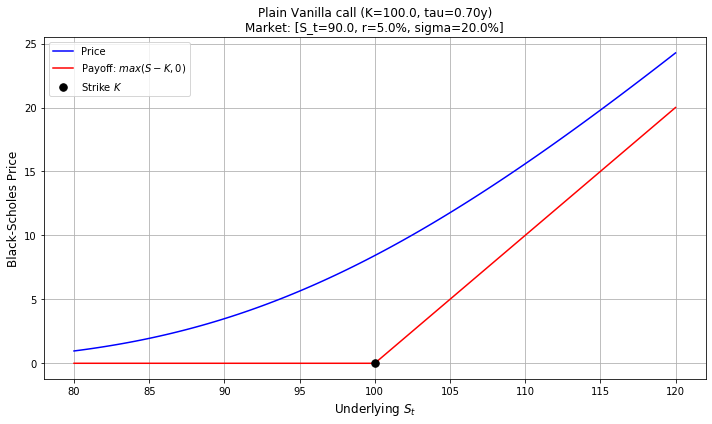

In [93]:
option_plotter.plot()

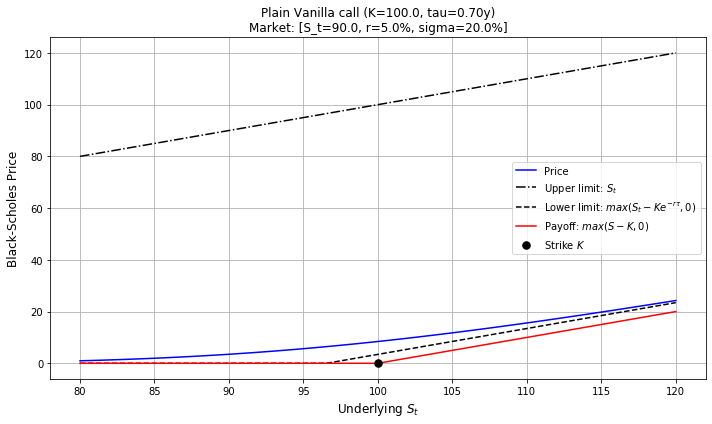

In [94]:
option_plotter.plot(plot_limits=True)

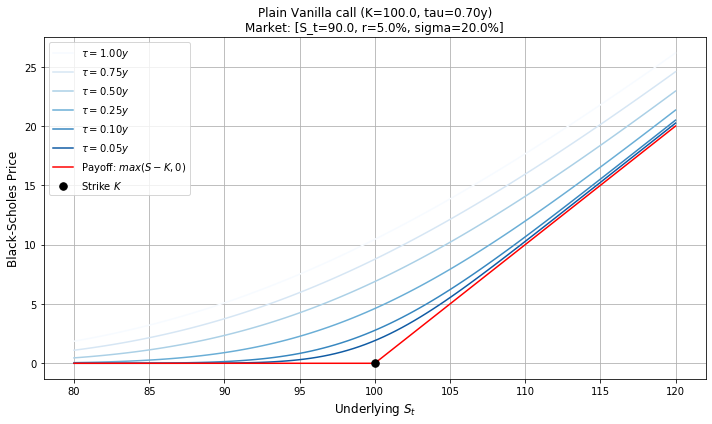

In [95]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.75, 1.0])

In [96]:
option_plotter = OptionPlotter(Vanilla_Call, S=[80, 90, 100, 110, 120], tau=[0.01, 0.5, 1])

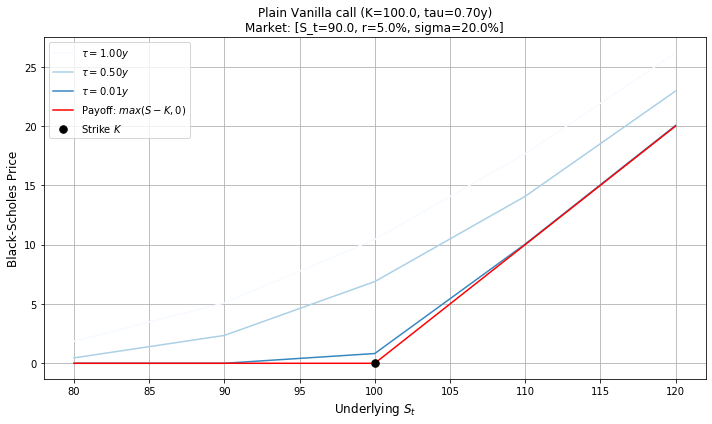

In [97]:
option_plotter.plot()

In [98]:
CON_Put = DigitalOption(market_env, option_type='put')
CON_Put

Initializing the EuropeanOption!


DigitalOption('put', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [99]:
option_plotter = OptionPlotter(CON_Put)

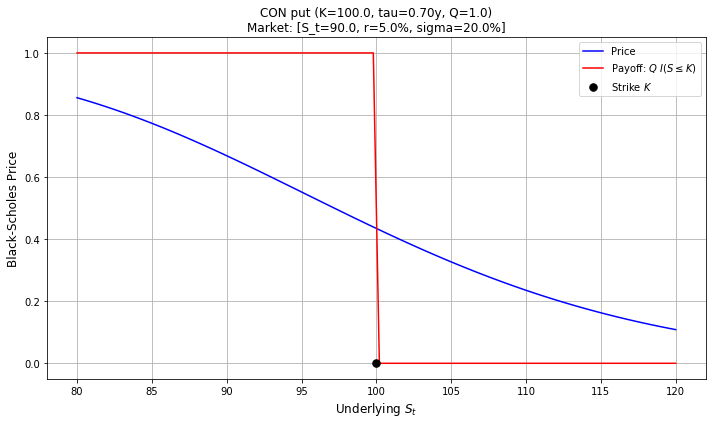

In [100]:
option_plotter.plot()

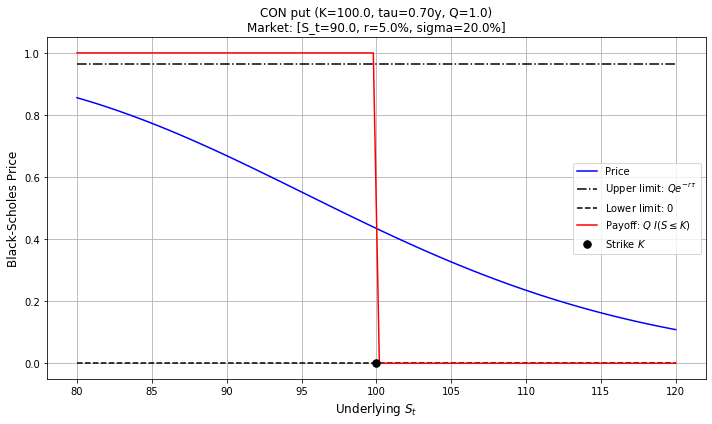

In [101]:
option_plotter.plot(plot_limits=True)

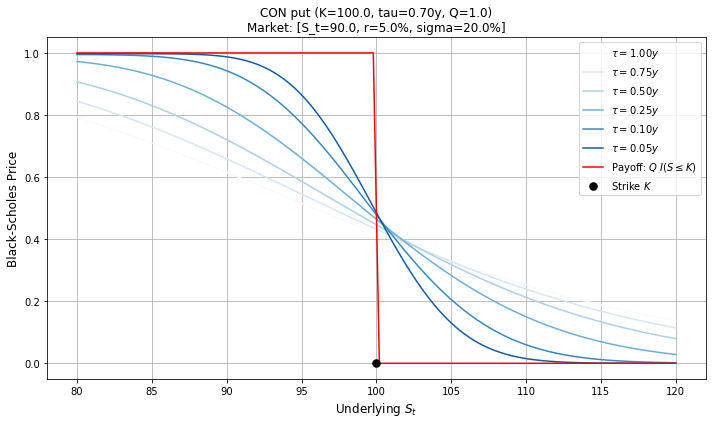

In [102]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.75, 1.0])

In [103]:
option_plotter = OptionPlotter(CON_Put,  tau=[0.01, 0.5, 1])

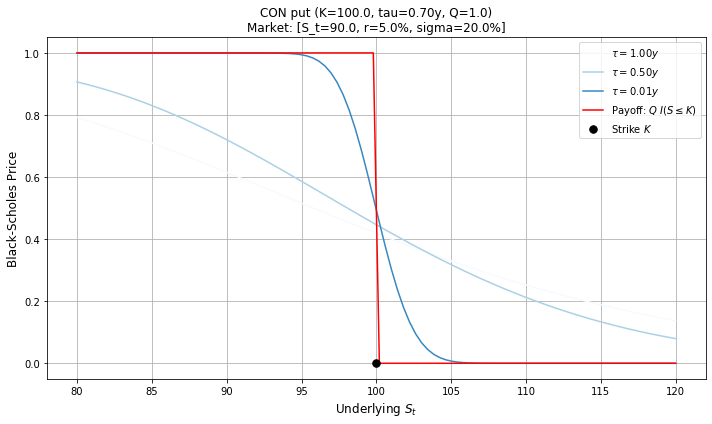

In [104]:
option_plotter.plot()

## _focus on:_ PnL

In [105]:
class EuropeanOption:
    """
    EuropeanOption abstract class: an interface setting the template for any option with european-style exercise.
    This class is not meant to be instantiated.
    
    Attributes:
    -----------
        type (str):               type of the option. Can be either 'call' or 'put';
        S_t (float):              'S' attribute of mkt_env.
        K (float):                strike price;
        t (str; dt.datetime):     't' attribute of mkt_env.
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                'r' attribute of mkt_env.
        sigma (float):            'sigma' attribute of mkt_env.
    
    Template Methods:
    --------   
    
        getters for all common attributes
        
        setters for common attributes, not belonging to mkt_env
        
        payoff: float
            Template method for payoff. Raises NotImplementedError if called.

        price_upper_limit: float 
            Template method for upper limit. Raises NotImplementedError if called.

        price_lower_limit: float 
            Template method for lower limit. Raises NotImplementedError if called.
            
        price: float
            Template method for price. Raises NotImplementedError if called.
            
        PnL: float
            Template method for profit and loss. Raises NotImplementedError if called.

    """

    def __init__(self, mkt_env, option_type='call', K=100.0, T="31-12-2020"):
        
        print("Initializing the EuropeanOption!")

        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
        
        self.__type  = option_type
        self.__S     = mkt_env.get_S()
        self.__K     = K
        self.__t     = mkt_env.get_t()
        self.__T     = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        self.__tau   = self.__time_to_maturity()
        self.__r     = mkt_env.get_r()
        self.__sigma = mkt_env.get_sigma()
        
        # empty initial price of the option
        self.__initial_price = None
               
        # empty informations dictionary
        self.__docstring_dict = {}        
        
    # string representation method template
    def __repr__(self):
        raise NotImplementedError()
    
    # getters
    def get_type(self):
        return self.__type

    def get_S(self):
        return self.__S
    
    def get_sigma(self):
        return self.__sigma
    
    def get_K(self):
        return self.__K
    
    def get_t(self):
        return self.__t

    def get_T(self):
        return self.__T

    def get_tau(self):
        return self.__tau

    def get_r(self):
        return self.__r
    
    def get_sigma(self):
        return self.__sigma
    
    def get_initial_price(self):
        return NotImplementedError()
    
    # doctring getter template
    def get_docstring(self, label):
        raise NotImplementedError()

    # setters
    def set_type(self, option_type):
        self.__type = option_type
        
        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
            
    def set_K(self, K):
        self.__K = K
    
    def set_T(self, T):
        self.__T = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        # update time to maturity, given changed T, to keep internal consistency
        self.__update_tau() 
    
    def set_tau(self, tau):
        self.__tau = tau
        # update expiration date, given changed tau, to keep internal consistency
        self.__update_T()
        
    def __update_T(self):
        self.__T = self.__t + dt.timedelta(days=math.ceil(self.__tau*365))

    # time to maturity method (private)
    def __time_to_maturity(self):
        return (self.__T - self.__t).days / 365.0
    
    # payoff template
    def payoff(self):
        raise NotImplementedError()     
        
    # upper price limit template
    def price_upper_limit(self):
        raise NotImplementedError()     

    # lower price limit template
    def price_lower_limit(self):
        raise NotImplementedError()     
        
    # price template
    def price(self):
        raise NotImplementedError()
        
    # profit and loss calculation calculation - with optional *args and **kwargs parameters
    def PnL(self, *args, **kwargs):
        """
        Can be called as:
            - PnL(): uses .get_S() and .get_tau()
            - PnL(100.0): S == 100.0
            - PnL(100.0, 0.1): S == 100.0 and tau == 0.1
            - PnL(S=100.0, tau=0.1)
            - PnL([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - PnL(S=[100.0, ..., 120.0], tau=0.1)
        """
        
        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.get_tau()
        
        # if tau==0, this is the P&L at option's expiration, that is the PnL if the option is kept until maturity
        if tau == 0.0:
            # P&L = payoff - initial price
            return self.payoff(S) - self.get_initial_price()
        
        # if tau > 0, this is the P&L as if the option position is closed before maturity, when the time-to-maturity is tau
        else:
            # P&L = current price - initial price
            return self.price(S, tau) - self.get_initial_price()

In [106]:
class PlainVanillaOption(EuropeanOption):
    """
    PlainVanillaOption class implementing payoff and pricing of plain-vanilla call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        mkt_env (MarketEnvironment): Instance of MarketEnvironment class
        type (str):                  From 'type' attribute of EuropeanOption base class.
        S_t (float):                 'S' attribute of mkt_env.
        K (float):                   From 'K' attribute of EuropeanOption base class.
        t (str; dt.datetime):        't' attribute of mkt_env.
        T (str; dt.datetime):        From 'T' attribute of EuropeanOption base class.
        tau (float):                 time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                   'r' attribute of mkt_env.
        sigma (float):               'sigma' attribute of mkt_env.
    
    Public Methods:
    --------   
    
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla option price.
            
        price: float
            Computes the exact price of the option and returns it
            
    Usage: 
    --------   
        - default: PlainVanillaOption(mkt_env) is equivalent to 
                   PlainVanillaOption(mkt_env, option_type='call', K=100.0, T="31-12-2020")

        - general: PlainVanillaOption(mkt_env, option_type='call' or 'put' String, K=Float, T="DD-MM-YYYY" String)

    where: mkt_env is a MarketEnvironment instance.
    """
    
    # initializer with optional *args and **kwargs parameters
    def __init__(self, *args, **kwargs):  
        
        # calling the EuropeanOption constructor
        super(PlainVanillaOption, self).__init__(*args, **kwargs)
        
        # info strings
        self.__info = r"Plain Vanilla {} (K={:.1f}, tau={:.2f}y)".format(self.get_type(), self.get_K(), self.get_tau())
        self.__mkt_info = r"[S_t={:.1f}, r={:.1f}%, sigma={:.1f}%]".format(self.get_S(), self.get_r()*100, self.get_sigma()*100)
        
        # initial price of the option
        self.__initial_price = self.price()
        
        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $S_t$",
                'payoff':            r"Payoff: $max(S-K, 0)$",
                'price_lower_limit': r"Lower limit: $max(S_t - K e^{-r \tau}, 0)$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $K e^{-r \tau}$",
                'payoff':            r"Payoff: $max(K-S, 0)$",
                'price_lower_limit': r"Lower limit: $max(K e^{-r \tau} - S_t, 0)$"}
        }
                
    def __repr__(self):
        return r"PlainVanillaOption('{}', S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_info(self):
        return self.__info
    
    def get_mkt_info(self):
        return self.__mkt_info
    
    def get_initial_price(self):
        return self.__initial_price

    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label] 
    
    # payoff calculation - with optional *args and **kwargs parameters
    def payoff(self, *args, **kwargs):
        """
        Can be called as:
            - payoff(): uses .get_S() 
            - payoff(100.0): S == 100.0
            - payoff(S=100.0)
            - payoff([100.0, ..., 120.0]): S == [100.0, ..., 120.0] 
            - payoff(S=[100.0, ..., 120.0])
        """
        
        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
                
        # call case
        if self.get_type() == 'call':
            return self.__call_payoff(S)
        # put case
        else:
            return self.__put_payoff(S)
    
    def __call_payoff(self, S):
        if isinstance(S, Iterable):
            return np.array([max(0.0, s - self.get_K()) for s in S])
        else:
            return max(0.0, S - self.get_K())

    def __put_payoff(self, S):
        if isinstance(S, Iterable):
            return np.array([max(0.0, self.get_K() - s) for s in S])
        else:
            return max(0.0, self.get_K() - S)
        
    # upper price limit - with optional *args and **kwargs parameters
    def price_upper_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_upper_limit(): uses .get_S() and .get_tau()
            - price_upper_limit(100.0): S == 100.0
            - price_upper_limit(100.0, 0.1): S == 100.0 and tau == 0.1
            - price_upper_limit(S=100.0, tau=0.1)
            - price_upper_limit([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price_upper_limit(S=[100.0, ..., 120.0], tau=0.1)
        """

        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.get_tau()
                        
        # call case
        if self.get_type() == 'call':
            return S
        # put case
        else:
            return self.__put_price_upper_limit(S, tau)
    
    def __put_price_upper_limit(self, S, tau):
        if isinstance(S, Iterable):
            return np.repeat(self.get_K()*np.exp(-self.get_r() * tau), repeats=len(S)) 
        else:
            return self.get_K()*np.exp(-self.get_r() * tau)

    # lower price limit - with optional *args and **kwargs parameters
    def price_lower_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_lower_limit(): uses .get_S() and .get_tau()
            - price_lower_limit(100.0): S == 100.0
            - price_lower_limit(100.0, 0.1): S == 100.0 and tau == 0.1
            - price_lower_limit(S=100.0, tau=0.1)
            - price_lower_limit([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price_lower_limit(S=[100.0, ..., 120.0], tau=0.1)
        """

        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.get_tau()
                                       
        # call case
        if self.get_type() == 'call':
            return self.__call_price_lower_limit(S, tau)
        # put case
        else:
            return self.__put_price_lower_limit(S, tau)

    def __call_price_lower_limit(self, S, tau):
        if isinstance(S, Iterable):
            return np.array([max(s - self.get_K()*np.exp(-self.get_r() * tau), 0.0) for s in S])
        else:
            return max(S - self.get_K()*np.exp(-self.get_r() * tau), 0.0)
                                       
    def __put_price_lower_limit(self, S, tau):
        if isinstance(S, Iterable):
            return np.array([max(self.get_K()*np.exp(-self.get_r() * tau) - s, 0.0) for s in S])
        else:
            return max(self.get_K()*np.exp(-self.get_r() * tau) - S, 0.0)
                                       
    # price calculation - with optional *args and **kwargs parameters
    def price(self, *args, **kwargs):
        """
        Can be called as:
            - price(): uses .get_S() and .get_tau()
            - price(100.0): S == 100.0
            - price(100.0, 0.1): S == 100.0 and tau == 0.1
            - price(S=100.0, tau=0.1)
            - price([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price(S=[100.0, ..., 120.0], tau=0.1)
        """
                       
        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.get_tau()
               
        # call case
        if self.get_type() == 'call':
            return np.array([self.__call_price(s, tau) for s in S]) if isinstance(S, Iterable) else self.__call_price(S, tau)
        # put case
        else:
            return np.array([self.__put_price(s, tau) for s in S]) if isinstance(S, Iterable) else self.__put_price(S, tau)
          
    def __call_price(self, S, tau):
        
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        elif tau == 0.0: # this is to avoid 0/0 issues
            return self.__call_payoff(S)
        else:
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = S * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self, S, tau):
        """ Put price from Put-Call parity relation: Call + Ke^{-r*tau} = Put + S"""
        return self.__call_price(S, tau) + self.get_K() * np.exp(- self.get_r() * tau) - S     

In [107]:
class DigitalOption(EuropeanOption):
    """
    DigitalOption class implementing payoff and pricing of digital call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        mkt_env (MarketEnvironment): Instance of MarketEnvironment class
        Q (float):                   cash amount
        type (str):                  From 'type' attribute of EuropeanOption base class.
        S_t (float):                 'S' attribute of mkt_env.
        K (float):                   From 'K' attribute of EuropeanOption base class.
        t (str; dt.datetime):        't' attribute of mkt_env.
        T (str; dt.datetime):        From 'T' attribute of EuropeanOption base class.
        tau (float):                 time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                   'r' attribute of mkt_env.
        sigma (float):               'sigma' attribute of mkt_env.
    
    Public Methods:
    --------   
    
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla option price.
            
        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    Usage: 
    --------   
        - default: DigitalOption(mkt_env) is equivalent to 
                   DigitalOption(mkt_env, cash_amount=1.0, option_type='call', K=100.0, T="31-12-2020")

        - general: DigitalOption(mkt_env, cash_amount=Float, option_type='call' or 'put' String, K=Float, T="DD-MM-YYYY" String)

    where: mkt_env is a MarketEnvironment instance.
    """

    # initializer with optional *args and **kwargs parameters and default cash_amount
    # default keyword arguments (like cash_amount here) must go after args list argument in function def
    def __init__(self, *args, cash_amount=1.0, **kwargs):  
        
        # calling the EuropeanOption constructor
        super(DigitalOption, self).__init__(*args, **kwargs)
        
        # amount of cash in case of payment
        self.__Q = cash_amount    
        
        # info strings
        self.__info = r"CON {} (K={:.1f}, tau={:.2f}y, Q={:.1f})".format(self.get_type(), self.get_K(), self.get_tau(), self.get_Q())
        self.__mkt_info = r"[S_t={:.1f}, r={:.1f}%, sigma={:.1f}%]".format(self.get_S(), self.get_r()*100, self.get_sigma()*100)
        
        # initial price of the option
        self.__initial_price = self.price()

        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S > K)$",
                'price_lower_limit': r"Lower limit: $0$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S \leq K)$",
                'price_lower_limit': r"Lower limit: $0$"}
        }        
                
    def __repr__(self):
        return r"DigitalOption('{}', cash={:.1f}, S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_Q(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_info(self):
        return self.__info
    
    def get_mkt_info(self):
        return self.__mkt_info
    
    def get_Q(self):
        return self.__Q
    
    def get_initial_price(self):
        return self.__initial_price
    
    # docstring getter
    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label] 
    
    # setters
    def set_Q(self, cash_amount):
        self.__Q = cash_amount
    
    # payoff calculation - with optional *args and **kwargs parameters
    def payoff(self, *args, **kwargs):
        """
        Can be called as:
            - payoff(): uses .get_S() 
            - payoff(100.0): S == 100.0
            - payoff(S=100.0)
            - payoff([100.0, ..., 120.0]): S == [100.0, ..., 120.0] 
            - payoff(S=[100.0, ..., 120.0])
        """
        
        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        
        # call case
        if self.get_type() == 'call':
            return self.__call_payoff(S)
        # put case
        else:
            return self.__put_payoff(S)

    def __call_payoff(self, S):
        if isinstance(S, Iterable):
            return np.array([self.get_Q() * int(s > self.get_K()) for s in S])
        else:
            return self.get_Q() * int(S > self.get_K())

    def __put_payoff(self, S):
        if isinstance(S, Iterable):
            return np.array([self.get_Q() * int(s <= self.get_K()) for s in S])
        else:
            return self.get_Q() * int(S <= self.get_K())
        
    # upper price limit - with optional *args and **kwargs parameters
    def price_upper_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_upper_limit(): uses .get_S() and .get_tau()
            - price_upper_limit(100.0): S == 100.0
            - price_upper_limit(100.0, 0.1): S == 100.0 and tau == 0.1
            - price_upper_limit(S=100.0, tau=0.1)
            - price_upper_limit([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price_upper_limit(S=[100.0, ..., 120.0], tau=0.1)
        """

        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.get_tau()
            
        # the same for call and put
        return self.__price_upper_limit(S, tau)
 
    def __price_upper_limit(self, S, tau):
        if isinstance(S, Iterable):
            return np.repeat(self.get_Q()*np.exp(-self.get_r() * tau), repeats=len(S))
        else:
            return self.get_Q()*np.exp(-self.get_r() * tau)
                                       
    # lower price limit - with optional *args and **kwargs parameters
    def price_lower_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_lower_limit(): uses .get_S() 
            - price_lower_limit(100.0): S == 100.0
            - price_lower_limit(S=100.0)
            - price_lower_limit([100.0, ..., 120.0]): S == [100.0, ..., 120.0] 
            - price_lower_limit(S=[100.0, ..., 120.0])
        """

        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
            
        # call case
        if self.get_type() == 'call':
            return np.repeat(0.0, repeats=len(S)) if isinstance(S, Iterable) else 0.0
        # put case
        else:
            return np.repeat(0.0, repeats=len(S)) if isinstance(S, Iterable) else 0.0
        
    # price calculation - with optional *args and **kwargs parameters
    def price(self, *args, **kwargs):
        """
        Can be called as:
            - price(): uses .get_S() and .get_tau()
            - price(100.0): S == 100.0
            - price(100.0, 0.1): S == 100.0 and tau == 0.1
            - price(S=100.0, tau=0.1)
            - price([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price(S=[100.0, ..., 120.0], tau=0.1)
        """
                       
        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.get_tau()
            
        # call case
        if self.get_type() == 'call':
            return np.array([self.__call_price(s, tau) for s in S]) if isinstance(S, Iterable) else self.__call_price(S, tau)
        # put case
        else:
            return np.array([self.__put_price(s, tau) for s in S]) if isinstance(S, Iterable) else self.__put_price(S, tau)
          
    def __call_price(self, S, tau):
                
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        elif tau == 0.0: # this is to avoid 0/0 issues
            return self.__call_payoff(S)
        else:
            Q     = self.get_Q()
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = Q * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self, S, tau):
        """ Put price from Put-Call parity relation: CON_Call + CON_Put = Qe^{-r*tau}"""
        return self.get_Q() * np.exp(- self.get_r() * tau) - self.__call_price(S, tau)        

In [108]:
Vanilla_Call = PlainVanillaOption(market_env)
Vanilla_Call

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [109]:
Vanilla_Call.price()

3.487402470943657

In [110]:
Vanilla_Call.payoff()

0.0

In [111]:
Vanilla_Call.PnL()

0.0

In [112]:
Vanilla_Call.PnL(tau=0)

-3.487402470943657

In [113]:
Vanilla_Call.get_K()

100.0

In [114]:
Vanilla_Call.PnL(S=110, tau=0)

6.512597529056343

`getattr` 

In [115]:
getattr(Vanilla_Call, 'price')()

3.487402470943657

In [116]:
str(getattr(Vanilla_Call, 'PnL'))

"<bound method EuropeanOption.PnL of PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)>"

In [117]:
getattr(Vanilla_Call, 'PnL')()

0.0

In [118]:
class OptionPlotter():
    
    def __init__(self, FinancialInstrument, *args, **kwargs):

        # parse informations from FinancialInstrument
        self.fin_inst = FinancialInstrument
        self.__title_label = self.fin_inst.get_info() + "\n" + "Market: " + self.fin_inst.get_mkt_info()

        # define x-axis 
        S_range = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.fin_inst.get_K()
        self.set_x_axis(S_range)

        # define multi-lines (different tau)
        multi_tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.fin_inst.get_tau()
        self.set_multi_tau(multi_tau)
        
    # getters
    def get_x_axis(self):
        return self.__x_axis

    def get_tau(self):
        return self.__multi_tau

    def get_title(self):
        return self.__title_label
    
    # setters
    def set_x_axis(self, x):
        
        if isinstance(x, Iterable):
            self.__x_axis = x
        else:
            x_min = max(x-20, 0.0)
            x_max = x+20
            
            self.__x_axis = np.linspace(x_min, x_max, 100)
    
    def set_multi_tau(self, tau):
        if isinstance(tau, Iterable) and len(tau) > 1:
            # sort and take the reversed array
            self.__multi_tau = np.sort(tau)[::-1]
        elif isinstance(tau, Iterable) and len(tau) == 1:
            self.__multi_tau = tau[0]
        else:
            self.__multi_tau = tau
                    
    def plot(self, *args, method_name='price', **kwargs):
        
        # parse optional parameters
        if len(args) > 0:
            self.set_x_axis(args[0])
        elif 'S' in kwargs:
            self.set_x_axis(kwargs['S'])
            
        if len(args) > 1:
            self.set_multi_tau(args[1])
        elif 'tau' in kwargs:
            self.set_multi_tau(kwargs['tau'])
            
        # get x-axis and, possibly, multi-tau
        x_axis = self.get_x_axis()
        tau = self.get_tau()
        
        if isinstance(tau, Iterable):
            self.__plot_multi_tau(x_axis, tau, method_name)
        else:
            plot_limits = args[2] if len(args) > 2 else kwargs['plot_limits'] if 'plot_limits' in kwargs else False
            self.__plot_single_tau(x_axis, tau, plot_limits, method_name)
            
    def __plot_multi_tau(self, S, multi_tau, method_name):
        """
        Plot FinancialInstrument values against underlying value(s), possibly at multiple times-to-maturity.
        """
        
        plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(multi_tau))))

        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))

        # plot the price for different underlying values, one line for each different time to maturity tau
        for tau in multi_tau:

            ax.plot(S, getattr(self.fin_inst, method_name)(S, tau), '-', lw=1.5, label=r"$\tau={:.2f}y$".format(tau))

        # blue dot at original underlying level for reference, one dot for each different time to maturity tau
        for tau in multi_tau:
            S_t = self.fin_inst.get_S()
            ax.plot(S_t, getattr(self.fin_inst, method_name)(S_t, tau), '.', ms=10, 
                    label=r"$\tau={:.2f}y$ at $S={:.1f}$".format(tau, S_t))
            
        # plot the red payoff line for different underlying values
        if method_name == 'PnL':
            ax.plot(S, self.fin_inst.PnL(S, tau=0.0), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff') + r" (net of initial price)")
        else:
            ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff'))

        # plot a dot to highlight the strike position and a reference zero line
        ax.plot(self.fin_inst.get_K(), 0, 'k.', ms=15, label="Strike $K$")
        ax.plot(S, np.zeros_like(S), 'k--', lw=1.5)
        
        # set axis labels 
        ax.set_xlabel(r"Underlying Value at different times-to-maturity $\tau$", fontsize=12)
        ax.set_ylabel('Black-Scholes {}'.format(method_name), fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=2)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()
    
    def __plot_single_tau(self, S, tau, plot_limits, method_name):
        """
        Plot FinancialInstrument values against underlying value(s) at fixed time-to-maturity. Possibly, it plots theoretical
        upper and lower bounds of the price.
        """

        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))
        
        # plot the price for different underlying values
        if tau > 0:
            ax.plot(S, getattr(self.fin_inst, method_name)(S, tau), 'b-', lw=1.5, label=method_name)
        
        # blue dot at original underlying level for reference
        S_t = self.fin_inst.get_S()
        ax.plot(S_t, getattr(self.fin_inst, method_name)(S_t, tau), 'b.', ms=15, 
                label=method_name + r" at $S={:.1f}$".format(S_t))
        
        if plot_limits==True:
            # plot the upper limit, the price and the lower limit for different underlying values
            ax.plot(S, self.fin_inst.price_upper_limit(S, tau), 'k-.', lw=1.5, label=self.fin_inst.get_docstring('price_upper_limit'))
            ax.plot(S, self.fin_inst.price_lower_limit(S, tau), 'k--', lw=1.5, label=self.fin_inst.get_docstring('price_lower_limit'))

        # plot the red payoff line for different underlying values
        if method_name == 'PnL':
            ax.plot(S, self.fin_inst.PnL(S, tau=0.0), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff') + r" (net of initial price)")
        else:
            ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff'))

        # plot a dot to highlight the strike position and a reference zero line
        ax.plot(self.fin_inst.get_K(), 0, 'k.', ms=15, label="Strike $K$")
        ax.plot(S, np.zeros_like(S), 'k--', lw=1.5)

        # set axis labels 
        ax.set_xlabel(r"Underlying Value at time-to-maturity $\tau={:.2f}y$".format(tau), fontsize=12) 
        ax.set_ylabel('Black-Scholes {}'.format(method_name), fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=1)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()

In [119]:
market_env

MarketEnvironment(t=19-04-2020, r=5.0%, S_t=90.0, sigma=20.0%)

In [120]:
Vanilla_Call

PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [121]:
option_plotter = OptionPlotter(Vanilla_Call)

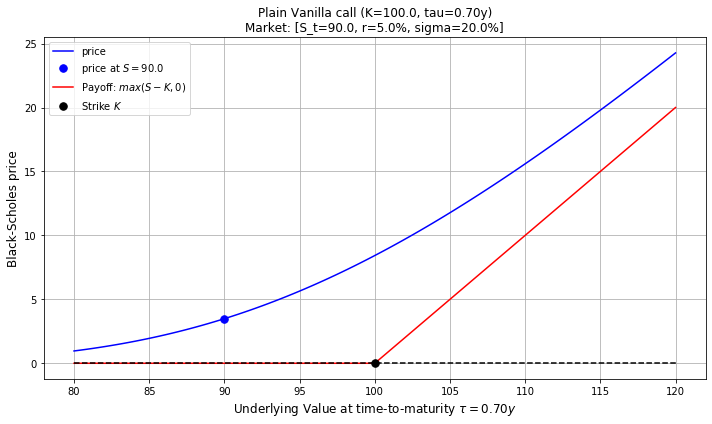

In [122]:
option_plotter.plot()

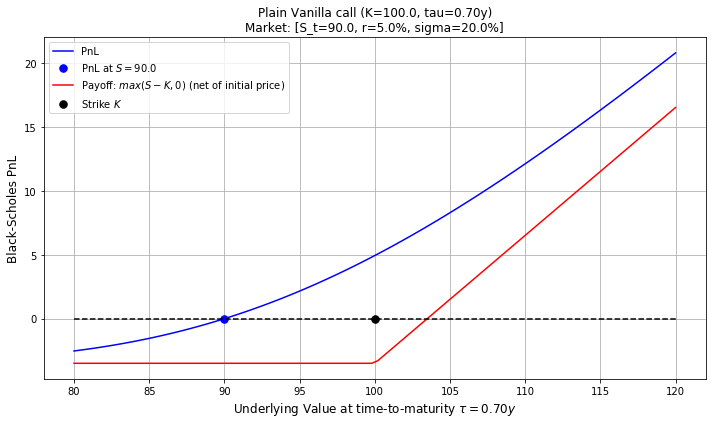

In [123]:
option_plotter.plot(method_name='PnL')

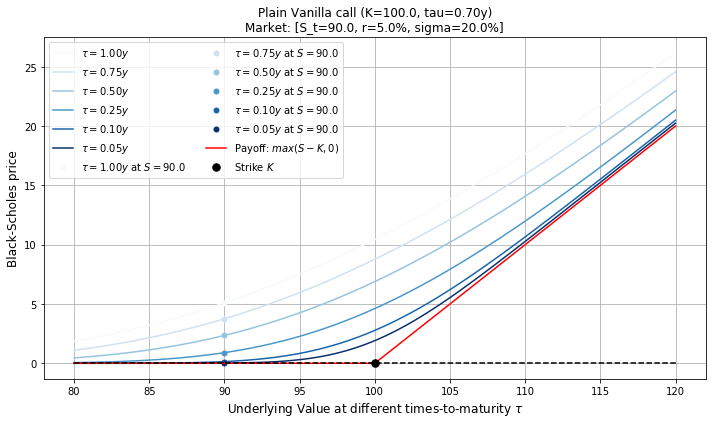

In [124]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.75, 1.0])

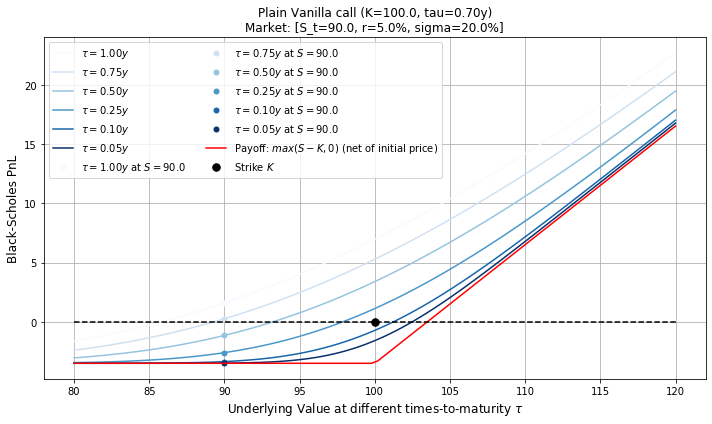

In [125]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.75, 1.0], method_name='PnL')

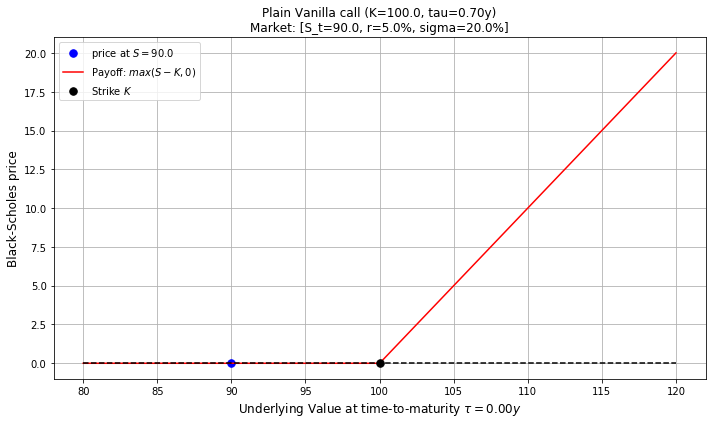

In [126]:
option_plotter.plot(tau=0.0)

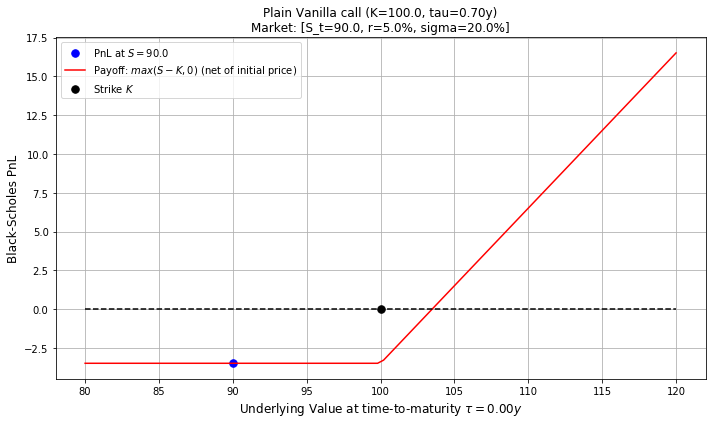

In [127]:
option_plotter.plot(tau=0.0, method_name='PnL')

In [128]:
CON_Call = DigitalOption(market_env)
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [129]:
option_plotter = OptionPlotter(CON_Call)

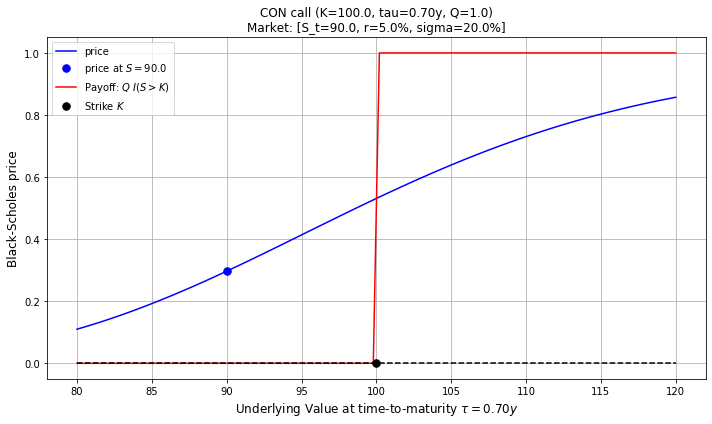

In [130]:
option_plotter.plot()

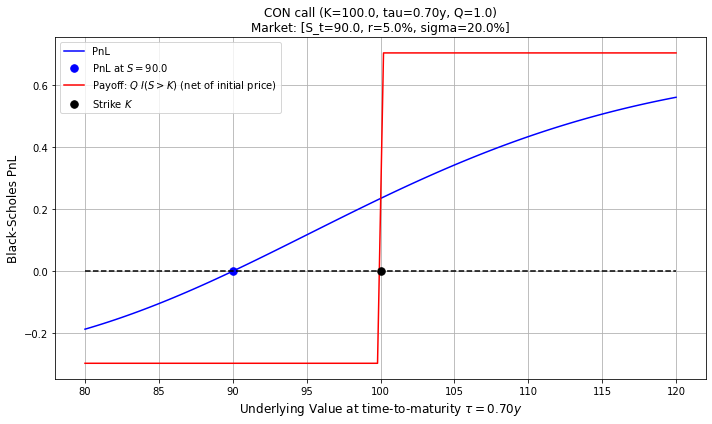

In [131]:
option_plotter.plot(method_name='PnL')

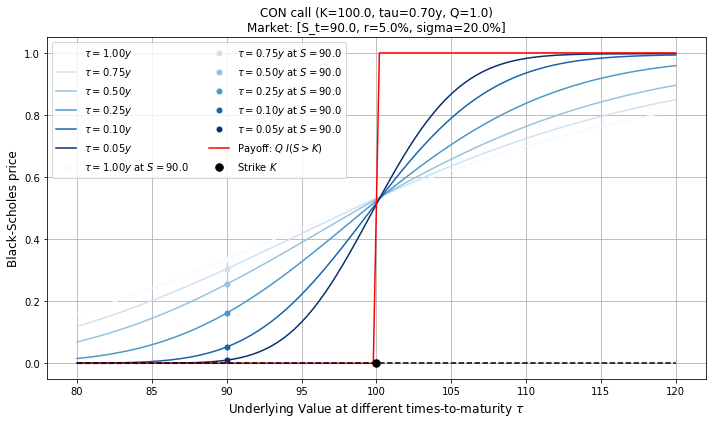

In [132]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.75, 1.0])

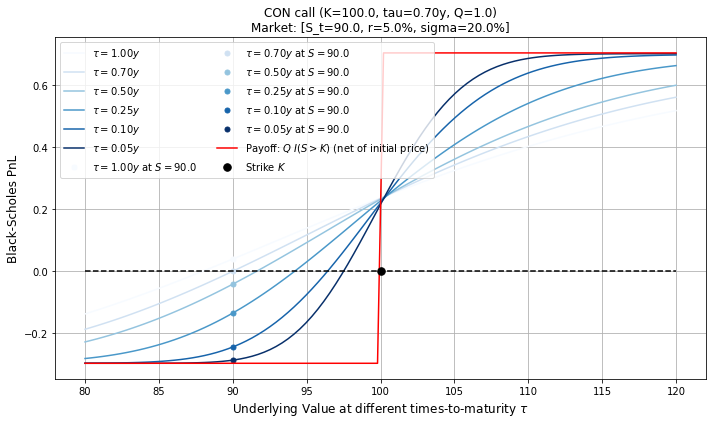

In [133]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.7, 1.0], method_name='PnL')

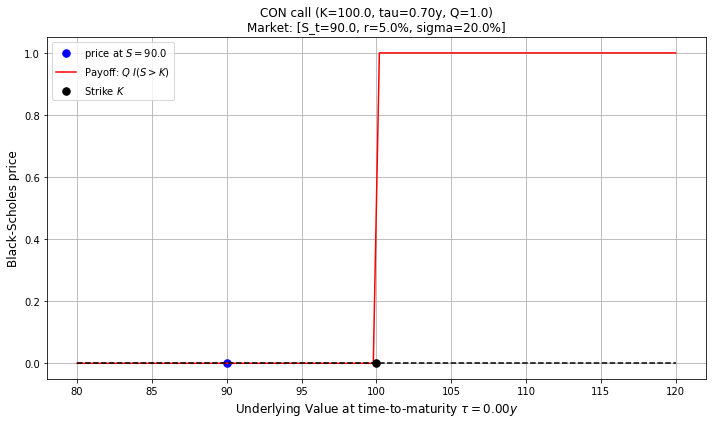

In [134]:
option_plotter.plot(tau=0.0)

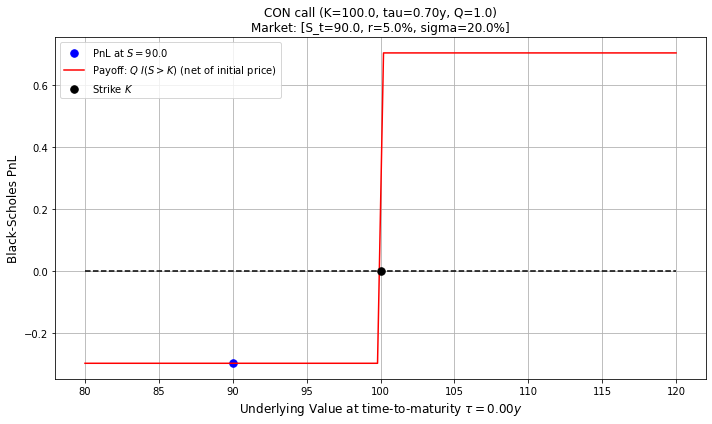

In [135]:
option_plotter.plot(tau=0.0, method_name='PnL')

# Composition application: a `Portfolio()` class

- OptionStrategy() single tau (sfruttare *args **kwargs)

- riesci a fare plot multi-tau?

Notice the use of `*args` `**kwargs` optional arguments in portfolio's analytics methods. We are letting the input parameters smoothly flow trough the portfolio interface and delegating to the payoff and price methods of the single instruments, the parsing operations or the parameters. This is analogous to what we have done in sub-class initialization

In [ ]:
class Portfolio:
    
    def __init__(self, name=""):
        
        # initialize an empty portfolio
        self.__composition = []
        
        # initialize empty info strings
        self.__info = "{} Portfolio: \n".format(name)
        self.__mkt_info = None
        
        # initialize underlying value, strikes and times-to-maturity attributes
        self.__S = None
        self.__K = []
        self.__tau = []
        
    def __repr__(self):
        return self.get_info()
    
    # getters
    def get_info(self):
        return self.__info
    
    def get_mkt_info(self):
        return self.__mkt_info
    
    def get_K(self):
        return self.__K
    
    def get_S(self):
        return self.__S

    def get_tau(self):
        return self.__tau
    
    def get_composition(self):
        return self.__composition
    
    # setters
    def set_S(self, S):
        self.__S = S
    
    # composition method
    def add_instrument(self, FinancialInstrument, position):
        
        self.__composition.append({"instrument": FinancialInstrument,
                                   "position":   position})
        
        # update portfolio info strings
        self.__update_info(FinancialInstrument, position)
        
        # update portfolio attributes
        self.__update_S(FinancialInstrument)
        self.__update_K(FinancialInstrument)
        self.__update_tau(FinancialInstrument)
    
    # private method to update the info
    def __update_info(self, fin_inst, pos):
        self.__info += fin_inst.get_info() + " (position: {})".format(pos) + "\n"
        if self.__mkt_info is None:
            self.__mkt_info = fin_inst.get_mkt_info()
            
    def __update_S(self, fin_inst):
        if self.get_S() is None:
            self.set_S(FinancialInstrument.get_S())

            
    def __update_K(self, fin_inst):
        self.__K.append(fin_inst.get_K())

    def __update_tau(self, fin_inst):
        self.__tau.append(fin_inst.get_tau())
                
    # portfolio "payoff", that is expiration value
    def payoff(self, *args, **kwargs):
        """
        Returns the portfolio payoff as the scalar product (i.e. sum of elementwise products) 
        between single instrument payoffs and positions.
        
        As single instruments .payoff(), can be called with single/multiple 'S' and single 'tau'. 
        """
              
        if self.get_composition(): 

            # single instrument payoffs and positions
            payoffs = np.array([inst["instrument"].payoff(*args, **kwargs) for inst in self.get_composition()])
            positions = np.array([inst["position"] for inst in self.get_composition()])
            
            return positions.dot(payoffs)
            
        else: # if portfolio is empty returns 0
            
            return 0.0  
        
    # portfolio value (called 'price' as for single options, to implement polymorphism)
    def price(self, *args, **kwargs):
        """
        Returns the portfolio value as the scalar product (i.e. sum of elementwise products) 
        between single instrument prices and positions.
        
        As single instruments .price(), can be called with single/multiple 'S' and single 'tau'. 
        """
        
        if self.get_composition(): 

            # single instrument prices and positions
            prices = np.array([inst["instrument"].price(*args, **kwargs) for inst in self.get_composition()])
            positions = np.array([inst["position"] for inst in self.get_composition()])
            
            return positions.dot(prices)
            
        else: # if portfolio is empty returns 0
            
            return 0.0  
        
    # portfolio P&L
    def PnL(self, *args, **kwargs):
        """
        Returns the portfolio Profit & Loss as the scalar product (i.e. sum of elementwise products) 
        between single instrument P&Ls and positions.
        
        As single instruments .PnL(), can be called with single/multiple 'S' and single 'tau'. 
        """
                
        if self.get_composition(): 

            # single instrument P&Ls and positions
            pnls = np.array([inst["instrument"].PnL(*args, **kwargs) for inst in self.get_composition()])
            positions = np.array([inst["position"] for inst in self.get_composition()])
            
            return positions.dot(pnls)
            
        else: # if portfolio is empty returns 0
            
            return 0.0  


## A. long and short positions on options

## B. spreads e straddles (same $\tau$ strategy)

## C. calendar spreads (multi $\tau$ strategy)

In [136]:
class Portfolio:
    
    def __init__(self, name=""):
        
        # initialize an empty portfolio
        self.__composition = []
        
        # initialize empty info strings
        self.__info = "{} Portfolio: \n".format(name)
        self.__mkt_info = None
        
        # initialize empty list of strikes, times-to-maturity and underlying value
        self.__K = []
        self.__tau = []
        self.__S = None
        
    def __repr__(self):
        return self.get_info()
    
    # getters
    def get_info(self):
        return self.__info
    
    def get_mkt_info(self):
        return self.__mkt_info
    
    def get_K(self):
        return self.__K
    
    def get_S(self):
        return self.__S

    def get_tau(self):
        return self.__tau
    
    def get_composition(self):
        return self.__composition
    
    # setters
    def set_S(self, S):
        self.__S = S
    
    # composition method
    def add_instrument(self, FinancialInstrument, position):
        
        self.__composition.append({"instrument": FinancialInstrument,
                                   "position":   position})
        
        # update portfolio attributes
        self.__update_info(FinancialInstrument, position)
        self.__update_K(FinancialInstrument)
        self.__update_tau(FinancialInstrument)
        if self.get_S() is None:
            self.set_S(FinancialInstrument.get_S())
    
    # private method to update the info
    def __update_info(self, fin_inst, pos):
        self.__info += fin_inst.get_info() + " (position: {})".format(pos) + "\n"
        if self.__mkt_info is None:
            self.__mkt_info = fin_inst.get_mkt_info()
            
    def __update_K(self, fin_inst):
        self.__K.append(fin_inst.get_K())

    def __update_tau(self, fin_inst):
        self.__tau.append(fin_inst.get_tau())
        
    def __check_tau_consistency(self, tau):
        if len(tau) != len(self.get_composition()):
            raise NotImplementedError("len(tau) == {} != {} number of instruments in portfolio".\
                                      format(len(tau), len(self.get_composition())))
        
    # portfolio "payoff", that is expiration value
    def payoff(self, S):
                
        if self.get_composition(): 

            instruments_payoff = np.array([instrument["instrument"].payoff(S) for instrument in self.get_composition()])
            
            positions = np.array([instrument["position"] for instrument in self.get_composition()])
            
            return positions.dot(instruments_payoff)
            
        else: # if portfolio is empty returns 0
            
            return 0.0  
        
    # portfolio value calculation
    def price(self, S, tau):
        
        if self.get_composition(): 
            
            if isinstance(tau, Iterable): # one tau per instrument
                self.__check_tau_consistency(tau)
                instruments_price = np.array([instrument["instrument"].price(S, tau) for tau, instrument in zip(tau, self.get_composition())])
            else: # same tau each instrument
                instruments_price = np.array([instrument["instrument"].price(S, tau) for instrument in self.get_composition()])

            positions = np.array([instrument["position"] for instrument in self.get_composition()])
            
            return positions.dot(instruments_price)
            
        else: # if portfolio is empty returns 0
            
            return 0.0    
        
    # portfolio P&L calculation
    def PnL(self, S, tau):
                
        if self.get_composition(): 
            
            if isinstance(tau, Iterable): # one tau per instrument
                self.__check_tau_consistency(tau)
                instruments_PnL = np.array([instrument["instrument"].PnL(S, tau) for tau, instrument in zip(tau, self.get_composition())])
            else: # same tau each instrument
                instruments_PnL = np.array([instrument["instrument"].PnL(S, tau) for instrument in self.get_composition()])

            positions = np.array([instrument["position"] for instrument in self.get_composition()])
            
            return positions.dot(instruments_PnL)
            
        else: # if portfolio is empty returns 0
            
            return 0.0        

In [137]:
Vanilla_Call = PlainVanillaOption(market_env)
Vanilla_Call

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [138]:
Vanilla_Put = PlainVanillaOption(market_env, option_type='put')
Vanilla_Put

Initializing the EuropeanOption!


PlainVanillaOption('put', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [139]:
CON_Call = DigitalOption(market_env)
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [140]:
CON_Put = DigitalOption(market_env, option_type='put')
CON_Put

Initializing the EuropeanOption!


DigitalOption('put', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [141]:
ptf = Portfolio()

In [142]:
ptf

 Portfolio: 

In [143]:
ptf.add_instrument(Vanilla_Call, 1)

In [144]:
ptf

 Portfolio: 
Plain Vanilla call (K=100.0, tau=0.70y) (position: 1)

In [145]:
S = Vanilla_Call.get_S()
tau = Vanilla_Call.get_tau()

In [146]:
ptf.price(S, tau)

3.487402470943657

In [147]:
Vanilla_Call.price()

3.487402470943657

In [148]:
ptf.add_instrument(Vanilla_Put, -5)

In [149]:
ptf

 Portfolio: 
Plain Vanilla call (K=100.0, tau=0.70y) (position: 1)
Plain Vanilla put (K=100.0, tau=0.70y) (position: -5)

In [150]:
ptf.payoff(S)

-50.0

In [151]:
1 * Vanilla_Call.payoff() - 5 * Vanilla_Put.payoff() 

-50.0

In [152]:
ptf.price(S, tau)

-46.71925046638197

In [153]:
1 * Vanilla_Call.price() - 5 * Vanilla_Put.price() 

-46.71925046638197

In [154]:
ptf.PnL(S, tau)

0.0

In [155]:
S_high = 2*Vanilla_Call.get_S()

In [156]:
ptf.PnL(S = S_high, tau=tau)

130.16321058561425

In [157]:
1 * Vanilla_Call.PnL(S = S_high) - 5 * Vanilla_Put.PnL(S = S_high) 

130.16321058561425

In [158]:
ptf.PnL(S = [S_high, S_high+1], tau=tau)

array([130.16321059, 131.16347883])

In [159]:
1 * Vanilla_Call.PnL(S = [S_high, S_high+1]) - 5 * Vanilla_Put.PnL(S = [S_high, S_high+1]) 

array([130.16321059, 131.16347883])

caso Calendar Spread

In [160]:
Vanilla_Call_short_term = PlainVanillaOption(market_env, K=100, T="31-05-2020")
Vanilla_Call_short_term

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-05-2020, tau=0.12y, r=5.0%, sigma=20.0%)

In [161]:
Vanilla_Call_long_term = PlainVanillaOption(market_env, K=100, T="31-10-2020")
Vanilla_Call_long_term

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-10-2020, tau=0.53y, r=5.0%, sigma=20.0%)

In [162]:
ptf_calendar_spread = Portfolio()
ptf_calendar_spread.add_instrument(Vanilla_Call_short_term, -1)
ptf_calendar_spread.add_instrument(Vanilla_Call_long_term, 1)
ptf_calendar_spread

 Portfolio: 
Plain Vanilla call (K=100.0, tau=0.12y) (position: -1)
Plain Vanilla call (K=100.0, tau=0.53y) (position: 1)

In [163]:
tau_short = Vanilla_Call_short_term.get_tau()
tau_short

0.11506849315068493

In [164]:
tau_long = Vanilla_Call_long_term.get_tau()
tau_long

0.5342465753424658

In [165]:
ptf_calendar_spread.PnL(S=S, tau=[0.0, tau_long-tau_short])

-0.46318222858370817

In [166]:
s = np.linspace(80, 120, 100)
x = ptf_calendar_spread.PnL(S=s, tau=[0.0, tau_long-tau_short])

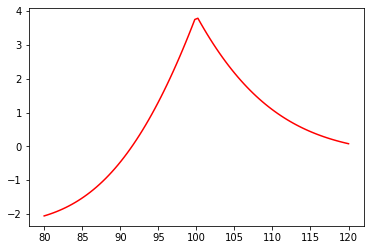

In [167]:
plt.plot(s, x, 'r-')

In [168]:
ptf_calendar_spread.get_K()

[100, 100]

In [169]:
ptf_calendar_spread.get_tau()

[0.11506849315068493, 0.5342465753424658]

In [170]:
ptf_calendar_spread.get_S()

90.0

In [171]:
class Plotter:
    """
    Interface Plotter class
    """
    
    def __init__(self, FinancialObject, *args, **kwargs):
        
        # parse informations from FinancialObject
        self.fin_inst = FinancialObject
        self.__title_label = self.fin_inst.get_info() + "\n" + "Market: " + self.fin_inst.get_mkt_info()
        
        # define empty x-axis object 
        self.__x_axis = None

    # getters
    def get_x_axis(self):
        raise NotImplementedError()
    
    # (differently specified according to the different kind of FinancialObject to plot)
    def get_tau(self):
        raise NotImplementedError() 

    def get_title(self):
        return self.__title_label
            
    # setter template for the x-axis (differently specified according to the different kind of FinancialObject to plot)
    def set_x_axis(self, x):
        raise NotImplementedError()
     
    # template plot method
    def plot(self):
        raise NotImplementedError()

class PortfolioPlotter(Plotter):
    """
    Plotter class for Portfolio
    """
    
    def __init__(self, Portfolio, *args, **kwargs):
        super(PortfolioPlotter, self).__init__(Portfolio)
 
        # define x-axis 
        S_range = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else None
        self.set_x_axis(S_range)

        # get times-to-maturity of each instrument in portfolio
        tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.fin_inst.get_tau()
        self.set_tau(tau)
        
    # getters
    def get_x_axis(self):
        return self.__x_axis
            
    def get_tau(self):
        return self.__tau
        
    # setters
    def set_x_axis(self, x):
        
        if x is None:
        
            strikes = self.fin_inst.get_K()

            x_min = max(min(strikes) - 20, 0.0)
            x_max = max(strikes) + 20

            self.__x_axis = np.linspace(x_min, x_max, 200)
            
        else:
            if isinstance(x, Iterable):
                self.__x_axis = x
            else:
                raise NotImplementedError("x-axis must be an Iterable")
                
    def set_tau(self, tau):
        if isinstance(tau, Iterable):
            self.__tau = tau
        else:
            self.__tau = [tau]
            
    def plot(self, *args, method_name='price', **kwargs):
        
        # parse optional parameters
        if len(args) > 0:
            self.set_x_axis(args[0])
        elif 'S' in kwargs:
            self.set_x_axis(kwargs['S'])
            
        if len(args) > 1:
            self.set_tau(args[1])
        elif 'tau' in kwargs:
            self.set_tau(kwargs['tau'])
            
        # get x-axis and, possibly, multi-tau
        x_axis = self.get_x_axis()
        tau = self.get_tau()
        
        self.__plot(x_axis, tau, method_name)

    def __plot(self, S, tau, method_name):
        """
        Plot Portfolio values against underlying value(s), possibly a different time-to-maturity for each instrument 
        in portfolio.
        """
        
        number_of_instruments = len(self.fin_inst.get_composition())
        
        plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.RdYlGn(np.linspace(0,1,number_of_instruments)))
        
        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))

        # plot the price for different underlying values
        ax.plot(S, getattr(self.fin_inst, method_name)(S, tau), 'b-', lw=1.5, label=method_name)

        # blue dot at original underlying level for reference
        S_t = self.fin_inst.get_S()
        ax.plot(S_t, getattr(self.fin_inst, method_name)(S_t, tau), 'b.', ms=15, label=method_name + r" at $S={:.1f}$".format(S_t))
            
#        # plot the red payoff line for different underlying values
#        if method_name == 'PnL':
#            ax.plot(S, self.fin_inst.PnL(S, tau=0.0), 'r-',  lw=1.5, label=r"Portfolio payoff (net of initial price)")
#        else:
#            ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=r"Portfolio payoff")

        # plot dashed red payoff lines for each instrument in the portfolio
        for tau_inst, inst in zip(tau, self.fin_inst.get_composition()):
            position = inst["position"]
            position_label = "+" if position > 0 else ""

            # plot the red payoff line for different underlying values
            if method_name == 'PnL':
                ax.plot(S, position * inst["instrument"].PnL(S, tau_inst), '--',  lw=1.5, 
                        label=method_name + " of " + position_label + str(position) + " " + inst["instrument"].get_info() + 
                              r" closed at $\tau={:.2f}y$".format(tau_inst))
            else:
                ax.plot(S, position * inst["instrument"].price(S, tau_inst), '--',  lw=1.5, 
                        label=method_name + " of " + position_label + str(position) + " " + inst["instrument"].get_info() +
                              r" closed at $\tau={:.2f}y$".format(tau_inst))
            
        
        # plot a dot to highlight the strike position and a reference zero line
        strikes = self.fin_inst.get_K()
        ax.plot(strikes, np.zeros_like(strikes), 'k.', ms=15, label="Strikes $K$")
        ax.plot(S, np.zeros_like(S), 'k--', lw=1.5)
        
        # set axis labels 
        ax.set_xlabel(r"Underlying Value", fontsize=12)
        ax.set_ylabel('Black-Scholes {}'.format(method_name), fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=1)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()
        
class OptionPlotter(Plotter):
    """
    Plotter class for single options
    """
    
    def __init__(self, FinancialInstrument, *args, **kwargs):
        super(OptionPlotter, self).__init__(FinancialInstrument)

        # define x-axis 
        S_range = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.fin_inst.get_K()
        self.set_x_axis(S_range)

        # define multi-lines (different tau)
        multi_tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.fin_inst.get_tau()
        self.set_multi_tau(multi_tau)
        
    # getters
    def get_x_axis(self):
        return self.__x_axis

    def get_tau(self):
        return self.__multi_tau
    
    # setters
    def set_x_axis(self, x):
        
        if isinstance(x, Iterable):
            self.__x_axis = x
        else:
            x_min = max(x-20, 0.0)
            x_max = x+20
            
            self.__x_axis = np.linspace(x_min, x_max, 100)
    
    def set_multi_tau(self, tau):
        if isinstance(tau, Iterable) and len(tau) > 1:
            # sort and take the reversed array
            self.__multi_tau = np.sort(tau)[::-1]
        elif isinstance(tau, Iterable) and len(tau) == 1:
            self.__multi_tau = tau[0]
        else:
            self.__multi_tau = tau
                    
    def plot(self, *args, method_name='price', **kwargs):
        
        # parse optional parameters
        if len(args) > 0:
            self.set_x_axis(args[0])
        elif 'S' in kwargs:
            self.set_x_axis(kwargs['S'])
            
        if len(args) > 1:
            self.set_multi_tau(args[1])
        elif 'tau' in kwargs:
            self.set_multi_tau(kwargs['tau'])
            
        # get x-axis and, possibly, multi-tau
        x_axis = self.get_x_axis()
        tau = self.get_tau()
        
        if isinstance(tau, Iterable):
            self.__plot_multi_tau(x_axis, tau, method_name)
        else:
            plot_limits = args[2] if len(args) > 2 else kwargs['plot_limits'] if 'plot_limits' in kwargs else False
            self.__plot_single_tau(x_axis, tau, plot_limits, method_name)
            
    def __plot_multi_tau(self, S, multi_tau, method_name):
        """
        Plot FinancialInstrument values against underlying value(s), possibly at multiple times-to-maturity.
        """
        
        plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(multi_tau))))

        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))

        # plot the price for different underlying values, one line for each different time to maturity tau
        for tau in multi_tau:

            ax.plot(S, getattr(self.fin_inst, method_name)(S, tau), '-', lw=1.5, label=r"$\tau={:.2f}y$".format(tau))

        # blue dot at original underlying level for reference, one dot for each different time to maturity tau
        for tau in multi_tau:
            S_t = self.fin_inst.get_S()
            ax.plot(S_t, getattr(self.fin_inst, method_name)(S_t, tau), '.', ms=10, 
                    label=r"$\tau={:.2f}y$ at $S={:.1f}$".format(tau, S_t))
            
        # plot the red payoff line for different underlying values
        if method_name == 'PnL':
            ax.plot(S, self.fin_inst.PnL(S, tau=0.0), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff') + r" (net of initial price)")
        else:
            ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff'))

        # plot a dot to highlight the strike position and a reference zero line
        ax.plot(self.fin_inst.get_K(), 0, 'k.', ms=15, label="Strike $K$")
        ax.plot(S, np.zeros_like(S), 'k--', lw=1.5)
        
        # set axis labels 
        ax.set_xlabel(r"Underlying Value at different times-to-maturity $\tau$", fontsize=12)
        ax.set_ylabel('Black-Scholes {}'.format(method_name), fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=2)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()
    
    def __plot_single_tau(self, S, tau, plot_limits, method_name):
        """
        Plot FinancialInstrument values against underlying value(s) at fixed time-to-maturity. Possibly, it plots theoretical
        upper and lower bounds of the price.
        """

        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))
        
        # plot the price for different underlying values
        if tau > 0:
            ax.plot(S, getattr(self.fin_inst, method_name)(S, tau), 'b-', lw=1.5, label=method_name)
        
        # blue dot at original underlying level for reference
        S_t = self.fin_inst.get_S()
        ax.plot(S_t, getattr(self.fin_inst, method_name)(S_t, tau), 'b.', ms=15, 
                label=method_name + r" at $S={:.1f}$".format(S_t))
        
        if plot_limits==True:
            # plot the upper limit, the price and the lower limit for different underlying values
            ax.plot(S, self.fin_inst.price_upper_limit(S, tau), 'k-.', lw=1.5, label=self.fin_inst.get_docstring('price_upper_limit'))
            ax.plot(S, self.fin_inst.price_lower_limit(S, tau), 'k--', lw=1.5, label=self.fin_inst.get_docstring('price_lower_limit'))

        # plot the red payoff line for different underlying values
        if method_name == 'PnL':
            ax.plot(S, self.fin_inst.PnL(S, tau=0.0), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff') + r" (net of initial price)")
        else:
            ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff'))

        # plot a dot to highlight the strike position and a reference zero line
        ax.plot(self.fin_inst.get_K(), 0, 'k.', ms=15, label="Strike $K$")
        ax.plot(S, np.zeros_like(S), 'k--', lw=1.5)

        # set axis labels 
        ax.set_xlabel(r"Underlying Value at time-to-maturity $\tau={:.2f}y$".format(tau), fontsize=12) 
        ax.set_ylabel('Black-Scholes {}'.format(method_name), fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=1)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()

In [172]:
market_env

MarketEnvironment(t=19-04-2020, r=5.0%, S_t=90.0, sigma=20.0%)

In [173]:
Vanilla_Call_short_term = PlainVanillaOption(market_env, K=91, T="31-05-2020")
Vanilla_Call_short_term

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=91.0, t=19-04-2020, T=31-05-2020, tau=0.12y, r=5.0%, sigma=20.0%)

In [174]:
opt_short_plt = OptionPlotter(Vanilla_Call_short_term)

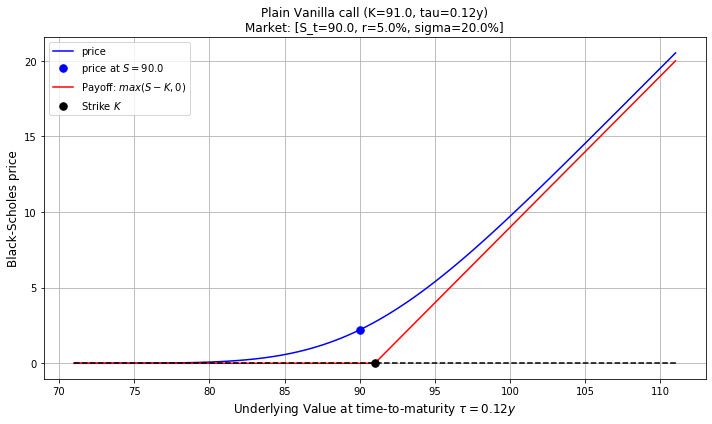

In [175]:
opt_short_plt.plot()

In [176]:
Vanilla_Call_long_term = PlainVanillaOption(market_env, K=91, T="30-06-2020")
Vanilla_Call_long_term

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=91.0, t=19-04-2020, T=30-06-2020, tau=0.20y, r=5.0%, sigma=20.0%)

In [177]:
opt_long_plt = OptionPlotter(Vanilla_Call_long_term)

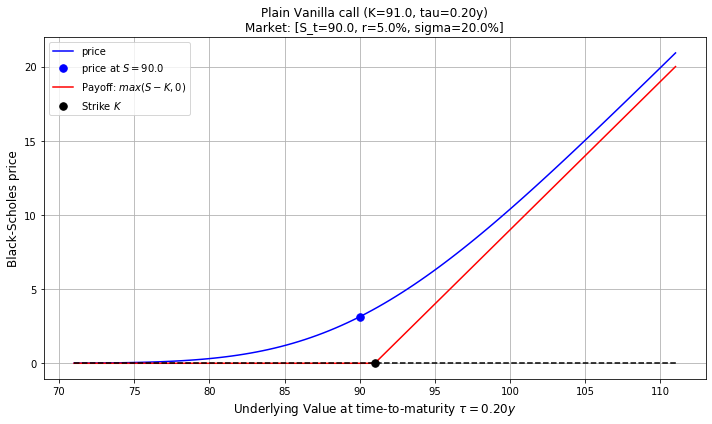

In [178]:
opt_long_plt.plot()

In [179]:
ptf = Portfolio(name="Calendar Spread")

In [180]:
ptf.add_instrument(Vanilla_Call_short_term, -1)
ptf.add_instrument(Vanilla_Call_long_term, 1)
ptf

Calendar Spread Portfolio: 
Plain Vanilla call (K=91.0, tau=0.12y) (position: -1)
Plain Vanilla call (K=91.0, tau=0.20y) (position: 1)

In [181]:
ptf_plt = PortfolioPlotter(ptf)

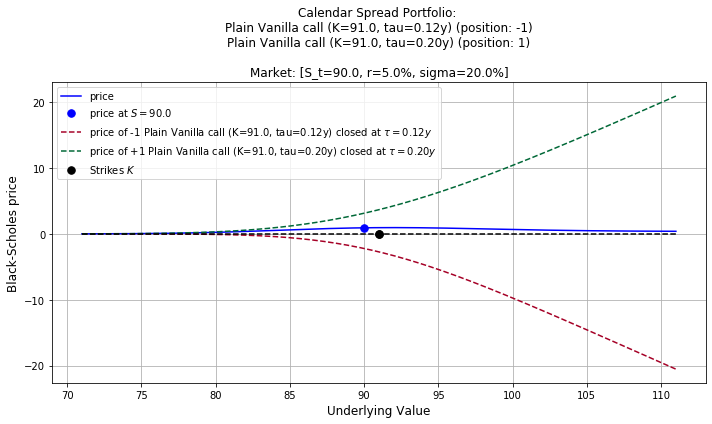

In [182]:
ptf_plt.plot()

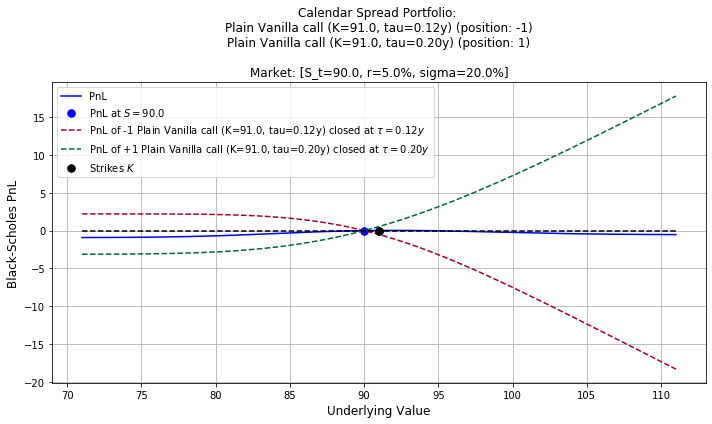

In [183]:
ptf_plt.plot(method_name='PnL')

In [184]:
tau_short = Vanilla_Call_short_term.get_tau()
tau_short

0.11506849315068493

In [185]:
tau_long = Vanilla_Call_long_term.get_tau()
tau_long

0.19726027397260273

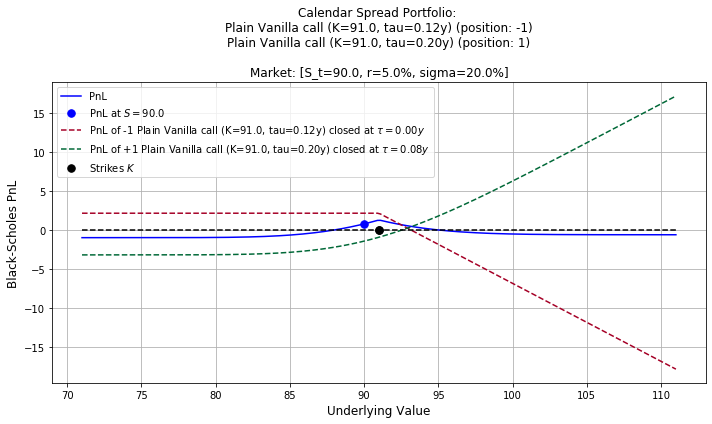

In [186]:
ptf_plt.plot(tau=[0.0, tau_long-tau_short], method_name='PnL')

In [187]:
ptf.PnL(S=400, tau=[0.0, tau_long-tau_short])

-0.5534661566454133